In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
################################# petrol price #####################################

In [3]:
petrol_price = pd.read_csv('fuelprice_nov.csv')

In [4]:
petrol_price

series_type        date  ron95  ron97  diesel
0            level  2017-03-30   2.13   2.41    2.11
1            level  2017-04-06   2.16   2.43    2.08
2            level  2017-04-13   2.24   2.52    2.16
3            level  2017-04-20   2.27   2.54    2.21
4            level  2017-04-27   2.21   2.49    2.14
..             ...         ...    ...    ...     ...
654  change_weekly  2023-10-19   0.00   0.10    0.00
655  change_weekly  2023-10-26   0.00   0.00    0.00
656  change_weekly  2023-11-02   0.00   0.00    0.00
657  change_weekly  2023-11-09   0.00   0.00    0.00
658  change_weekly  2023-11-16   0.00   0.00    0.00

[659 rows x 5 columns]

In [5]:
petrol_price= petrol_price[petrol_price['series_type'] == 'level']

In [6]:
petrol_price

series_type        date  ron95  ron97  diesel
0         level  2017-03-30   2.13   2.41    2.11
1         level  2017-04-06   2.16   2.43    2.08
2         level  2017-04-13   2.24   2.52    2.16
3         level  2017-04-20   2.27   2.54    2.21
4         level  2017-04-27   2.21   2.49    2.14
..          ...         ...    ...    ...     ...
325       level  2023-10-19   2.05   3.47    2.15
326       level  2023-10-26   2.05   3.47    2.15
327       level  2023-11-02   2.05   3.47    2.15
328       level  2023-11-09   2.05   3.47    2.15
329       level  2023-11-16   2.05   3.47    2.15

[330 rows x 5 columns]

In [7]:
petrol_price.isnull().sum()

series_type    0
date           0
ron95          0
ron97          0
diesel         0
dtype: int64

In [8]:
petrol_price.drop(['series_type'], axis=1, inplace=True)

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_90422/1001389905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrol_price.drop(['series_type'], axis=1, inplace=True)


In [9]:
petrol_price.rename(columns={'date': 'Date', 'ron95': 'RON 95', 'ron97': 'RON 97', 'diesel': 'DIESEL'}, inplace=True)

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_90422/1961201214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrol_price.rename(columns={'date': 'Date', 'ron95': 'RON 95', 'ron97': 'RON 97', 'diesel': 'DIESEL'}, inplace=True)


In [10]:
petrol_price.head()

Date  RON 95  RON 97  DIESEL
0  2017-03-30    2.13    2.41    2.11
1  2017-04-06    2.16    2.43    2.08
2  2017-04-13    2.24    2.52    2.16
3  2017-04-20    2.27    2.54    2.21
4  2017-04-27    2.21    2.49    2.14

In [11]:
petrol_price.shape

(330, 4)

In [12]:
petrol_price.dtypes

Date       object
RON 95    float64
RON 97    float64
DIESEL    float64
dtype: object

In [13]:
petrol_price['Date'] = pd.to_datetime(petrol_price['Date'], format='%Y-%m-%d')

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_90422/364259173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrol_price['Date'] = pd.to_datetime(petrol_price['Date'], format='%Y-%m-%d')


In [14]:
petrol_price.describe()

Date      RON 95      RON 97      DIESEL
count                            330  330.000000  330.000000  330.000000
mean   2020-08-26 02:45:49.090909184    2.018848    2.803545    2.094364
min              2017-03-30 00:00:00    1.250000    1.550000    1.400000
25%              2019-02-17 18:00:00    2.050000    2.410000    2.140000
50%              2020-09-22 12:00:00    2.050000    2.605000    2.150000
75%              2022-04-19 06:00:00    2.080000    3.350000    2.180000
max              2023-11-16 00:00:00    2.380000    4.840000    2.340000
std                              NaN    0.194575    0.693225    0.163227

In [15]:
petrol_price.isnull().sum()

Date      0
RON 95    0
RON 97    0
DIESEL    0
dtype: int64

In [16]:
petrol_price.duplicated().sum()

0

In [17]:
# Create a figure
fig = go.Figure()

# Add traces for RON 97, RON 95, and DIESEL
fig.add_trace(go.Scatter(x=petrol_price['Date'], y=petrol_price['RON 97'], mode='lines+markers', name='RON 97'))
fig.add_trace(go.Scatter(x=petrol_price['Date'], y=petrol_price['RON 95'], mode='lines+markers', name='RON 95'))
fig.add_trace(go.Scatter(x=petrol_price['Date'], y=petrol_price['DIESEL'], mode='lines+markers', name='DIESEL'))

# Update layout
fig.update_layout(
    title='Petrol Prices Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability (optional)
)

# Show the plot
fig.show()

In [18]:
petrol_price.set_index('Date', inplace=True)
monthly_petrol_price = petrol_price.resample('M').mean()

In [19]:
monthly_petrol_price

RON 95  RON 97  DIESEL
Date                              
2017-03-31   2.130  2.4100  2.1100
2017-04-30   2.220  2.4950  2.1475
2017-05-31   2.080  2.3600  2.0125
2017-06-30   1.986  2.2500  1.9120
2017-07-31   1.975  2.2275  1.9550
...            ...     ...     ...
2023-07-31   2.050  3.3700  2.1500
2023-08-31   2.050  3.3700  2.1500
2023-09-30   2.050  3.3700  2.1500
2023-10-31   2.050  3.4200  2.1500
2023-11-30   2.050  3.4700  2.1500

[81 rows x 3 columns]

In [20]:
monthly_petrol_price.reset_index(inplace=True)

In [21]:
monthly_petrol_price

Date  RON 95  RON 97  DIESEL
0  2017-03-31   2.130  2.4100  2.1100
1  2017-04-30   2.220  2.4950  2.1475
2  2017-05-31   2.080  2.3600  2.0125
3  2017-06-30   1.986  2.2500  1.9120
4  2017-07-31   1.975  2.2275  1.9550
..        ...     ...     ...     ...
76 2023-07-31   2.050  3.3700  2.1500
77 2023-08-31   2.050  3.3700  2.1500
78 2023-09-30   2.050  3.3700  2.1500
79 2023-10-31   2.050  3.4200  2.1500
80 2023-11-30   2.050  3.4700  2.1500

[81 rows x 4 columns]

In [22]:
monthly_petrol_price['YearMonth'] = monthly_petrol_price['Date'].dt.strftime('%Y-%m')

In [23]:
monthly_petrol_price

Date  RON 95  RON 97  DIESEL YearMonth
0  2017-03-31   2.130  2.4100  2.1100   2017-03
1  2017-04-30   2.220  2.4950  2.1475   2017-04
2  2017-05-31   2.080  2.3600  2.0125   2017-05
3  2017-06-30   1.986  2.2500  1.9120   2017-06
4  2017-07-31   1.975  2.2275  1.9550   2017-07
..        ...     ...     ...     ...       ...
76 2023-07-31   2.050  3.3700  2.1500   2023-07
77 2023-08-31   2.050  3.3700  2.1500   2023-08
78 2023-09-30   2.050  3.3700  2.1500   2023-09
79 2023-10-31   2.050  3.4200  2.1500   2023-10
80 2023-11-30   2.050  3.4700  2.1500   2023-11

[81 rows x 5 columns]

In [24]:
monthly_petrol_price.columns

Index(['Date', 'RON 95', 'RON 97', 'DIESEL', 'YearMonth'], dtype='object')

In [25]:
monthly_petrol_price.drop(['Date'], axis=1, inplace=True)

In [26]:
monthly_petrol_price

RON 95  RON 97  DIESEL YearMonth
0    2.130  2.4100  2.1100   2017-03
1    2.220  2.4950  2.1475   2017-04
2    2.080  2.3600  2.0125   2017-05
3    1.986  2.2500  1.9120   2017-06
4    1.975  2.2275  1.9550   2017-07
..     ...     ...     ...       ...
76   2.050  3.3700  2.1500   2023-07
77   2.050  3.3700  2.1500   2023-08
78   2.050  3.3700  2.1500   2023-09
79   2.050  3.4200  2.1500   2023-10
80   2.050  3.4700  2.1500   2023-11

[81 rows x 4 columns]

In [27]:
monthly_petrol_price[['RON 95', 'RON 97', 'DIESEL']] = monthly_petrol_price[['RON 95', 'RON 97', 'DIESEL']].round(2)

In [28]:
monthly_petrol_price[monthly_petrol_price['YearMonth'] == '2018-09']

RON 95  RON 97  DIESEL YearMonth
18     NaN     NaN     NaN   2018-09

In [29]:
monthly_petrol_price.interpolate(inplace=True)

In [30]:
monthly_petrol_price.isnull().sum()

RON 95       0
RON 97       0
DIESEL       0
YearMonth    0
dtype: int64

In [31]:
monthly_petrol_price[monthly_petrol_price['YearMonth'] == '2018-09']

RON 95  RON 97  DIESEL YearMonth
18     2.2    2.72    2.18   2018-09

In [32]:
#################################### gold price #########################################

In [33]:
gold_price = pd.read_csv('kijang-emas-prices.csv')

In [34]:
gold_price

Date     1 oz Unnamed: 2   1/2 oz Unnamed: 4   1/4 oz Unnamed: 6
0           NaN  Selling     Buying  Selling     Buying  Selling     Buying
1     03-Jan-17    5,478      5,256    2,790      2,628    1,421      1,314
2     04-Jan-17    5,522      5,296    2,813      2,648    1,432      1,324
3     05-Jan-17    5,576      5,351    2,841      2,675    1,447      1,338
4     06-Jan-17    5,611      5,384    2,858      2,692    1,456      1,346
...         ...      ...        ...      ...        ...      ...        ...
1665  15-Nov-23    9,709      9,327    4,946      4,663    2,519      2,332
1666  16-Nov-23    9,743      9,351    4,963      4,676    2,528      2,338
1667  17-Nov-23    9,831      9,454    5,008      4,727    2,551      2,364
1668  20-Nov-23    9,784      9,403    4,984      4,701    2,538      2,351
1669  21-Nov-23    9,793      9,414    4,989      4,707    2,541      2,353

[1670 rows x 7 columns]

In [35]:
gold_price.columns

Index(['Date', '1 oz', 'Unnamed: 2', '1/2 oz', 'Unnamed: 4', '1/4 oz',
       'Unnamed: 6'],
      dtype='object')

In [36]:
gold_price.rename(columns={'1 oz': 'selling_gold_price','Unnamed: 2':'buying_gold_price'}, inplace=True)

In [37]:
gold_price.drop(['1/2 oz', 'Unnamed: 4', '1/4 oz',
       'Unnamed: 6'], axis=1, inplace=True)

In [38]:
gold_price

Date selling_gold_price buying_gold_price
0           NaN            Selling            Buying
1     03-Jan-17              5,478             5,256
2     04-Jan-17              5,522             5,296
3     05-Jan-17              5,576             5,351
4     06-Jan-17              5,611             5,384
...         ...                ...               ...
1665  15-Nov-23              9,709             9,327
1666  16-Nov-23              9,743             9,351
1667  17-Nov-23              9,831             9,454
1668  20-Nov-23              9,784             9,403
1669  21-Nov-23              9,793             9,414

[1670 rows x 3 columns]

In [39]:
gold_price.isnull().sum()

Date                  1
selling_gold_price    0
buying_gold_price     0
dtype: int64

In [40]:
gold_price.dropna(axis=0, inplace=True)

In [41]:
gold_price.isnull().sum()

Date                  0
selling_gold_price    0
buying_gold_price     0
dtype: int64

In [42]:
gold_price.duplicated().sum()

1

In [43]:
gold_price[gold_price['Date'].duplicated(keep=False)]

Date selling_gold_price buying_gold_price
898   11-Sep-20              8,558             8,217
899   11-Sep-20              8,587             8,255
1389  29-Sep-22              8,116             7,803
1390  29-Sep-22              8,116             7,803

In [44]:
gold_price.drop_duplicates(subset='Date', keep='first', inplace=True)

In [45]:
gold_price.duplicated().sum()

0

In [46]:
gold_price.dtypes

Date                  object
selling_gold_price    object
buying_gold_price     object
dtype: object

In [47]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_90422/793779206.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [48]:
# Remove commas from the '1 oz Selling' column and convert to float
gold_price['selling_gold_price'] = gold_price['selling_gold_price'].str.replace(',', '').astype(float)
gold_price['buying_gold_price'] = gold_price['buying_gold_price'].str.replace(',', '').astype(float)

In [49]:
gold_price.set_index('Date', inplace=True)
gold_price_monthly = gold_price.resample('M').mean()

In [50]:
gold_price.reset_index(inplace=True)

# Create a figure
fig = go.Figure()

# Add traces for RON 97, RON 95, and DIESEL
fig.add_trace(go.Scatter(x=gold_price['Date'], y=gold_price['selling_gold_price'], mode='lines+markers', name='selling_gold_price'))
fig.add_trace(go.Scatter(x=gold_price['Date'], y=gold_price['buying_gold_price'], mode='lines+markers', name='buying_gold_price'))

# Update layout
fig.update_layout(
    title='Gold Prices Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability (optional)
)

# Show the plot
fig.show()

In [51]:
gold_price_monthly

selling_gold_price  buying_gold_price
Date                                             
2017-01-31         5644.800000        5415.750000
2017-02-28         5819.000000        5580.611111
2017-03-31         5803.652174        5566.043478
2017-04-30         5944.578947        5702.421053
2017-05-31         5707.095238        5480.761905
...                        ...                ...
2023-07-31         9489.531000        9117.665000
2023-08-31         9374.751364        9007.398636
2023-09-30         9528.700000        9158.200000
2023-10-31         9621.681818        9247.227273
2023-11-30         9822.785714        9438.214286

[83 rows x 2 columns]

In [52]:
gold_price_monthly.columns

Index(['selling_gold_price', 'buying_gold_price'], dtype='object')

In [53]:
gold_price_monthly['selling_gold_price'] = gold_price_monthly['selling_gold_price'].round(2)
gold_price_monthly['buying_gold_price'] = gold_price_monthly['buying_gold_price'].round(2)

In [54]:
gold_price_monthly

selling_gold_price  buying_gold_price
Date                                             
2017-01-31             5644.80            5415.75
2017-02-28             5819.00            5580.61
2017-03-31             5803.65            5566.04
2017-04-30             5944.58            5702.42
2017-05-31             5707.10            5480.76
...                        ...                ...
2023-07-31             9489.53            9117.66
2023-08-31             9374.75            9007.40
2023-09-30             9528.70            9158.20
2023-10-31             9621.68            9247.23
2023-11-30             9822.79            9438.21

[83 rows x 2 columns]

In [55]:
gold_price_monthly.reset_index(inplace=True)

In [56]:
gold_price_monthly['YearMonth'] = gold_price_monthly['Date'].dt.strftime('%Y-%m')

In [57]:
gold_price_monthly.dtypes

Date                  datetime64[ns]
selling_gold_price           float64
buying_gold_price            float64
YearMonth                     object
dtype: object

In [58]:
gold_price_monthly.drop(['Date'], axis=1, inplace=True)

In [59]:
merged_data_1 = monthly_petrol_price.merge(gold_price_monthly, on='YearMonth', how='inner')

In [60]:
merged_data_1 

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price
0     2.13    2.41    2.11   2017-03             5803.65            5566.04
1     2.22    2.50    2.15   2017-04             5944.58            5702.42
2     2.08    2.36    2.01   2017-05             5707.10            5480.76
3     1.99    2.25    1.91   2017-06             5730.11            5506.28
4     1.98    2.23    1.96   2017-07             5624.14            5406.38
..     ...     ...     ...       ...                 ...                ...
76    2.05    3.37    2.15   2023-07             9489.53            9117.66
77    2.05    3.37    2.15   2023-08             9374.75            9007.40
78    2.05    3.37    2.15   2023-09             9528.70            9158.20
79    2.05    3.42    2.15   2023-10             9621.68            9247.23
80    2.05    3.47    2.15   2023-11             9822.79            9438.21

[81 rows x 6 columns]

In [61]:
merged_data_1.isnull().sum()

RON 95                0
RON 97                0
DIESEL                0
YearMonth             0
selling_gold_price    0
buying_gold_price     0
dtype: int64

In [62]:
merged_data_1.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'YearMonth', 'selling_gold_price',
       'buying_gold_price'],
      dtype='object')

In [63]:
################################## exchange rate ########################################

In [64]:
exchange_rate =pd.read_csv('exchange-rates.csv')

In [65]:
exchange_rate

Unnamed: 0     USD     GBP     EUR  JPY100     CHF     AUD     CAD  \
0     03-Jan-17  4.4925  5.5024  4.6879  3.8051  4.3795  3.2409  3.3484   
1     04-Jan-17  4.4985  5.5154  4.6937  3.8199  4.3839  3.2706  3.3547   
2     05-Jan-17  4.4850  5.5067  4.7167  3.8552  4.3984  3.2729  3.3734   
3     06-Jan-17  4.4755  5.5442  4.7411  3.8559  4.4229  3.2826  3.3767   
4     09-Jan-17  4.4765  5.4522  4.7218  3.8213  4.4010  3.2777  3.3823   
...         ...     ...     ...     ...     ...     ...     ...     ...   
5012        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5013        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5014        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5015        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5016        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         SGD   HKD100  
0     3.0995  57.9195  
1     3.1098  58.0025  
2     3.1287  57.8396  
3     3.1194  57.7100  
4     3.1066  57.7188  
...      ...      ...  
5012     NaN      NaN  
5013     NaN      NaN  
5014     NaN      NaN  
5015     NaN      NaN  
5016     NaN      NaN  

[5017 rows x 10 columns]

In [66]:
exchange_rate.columns

Index(['Unnamed: 0', 'USD', 'GBP', 'EUR', 'JPY100', 'CHF', 'AUD', 'CAD', 'SGD',
       'HKD100'],
      dtype='object')

In [67]:
exchange_rate.rename(columns={'Unnamed: 0': 'Date','USD':'RM/USD_exchange'}, inplace=True)

In [68]:
exchange_rate

Date  RM/USD_exchange     GBP     EUR  JPY100     CHF     AUD  \
0     03-Jan-17           4.4925  5.5024  4.6879  3.8051  4.3795  3.2409   
1     04-Jan-17           4.4985  5.5154  4.6937  3.8199  4.3839  3.2706   
2     05-Jan-17           4.4850  5.5067  4.7167  3.8552  4.3984  3.2729   
3     06-Jan-17           4.4755  5.5442  4.7411  3.8559  4.4229  3.2826   
4     09-Jan-17           4.4765  5.4522  4.7218  3.8213  4.4010  3.2777   
...         ...              ...     ...     ...     ...     ...     ...   
5012        NaN              NaN     NaN     NaN     NaN     NaN     NaN   
5013        NaN              NaN     NaN     NaN     NaN     NaN     NaN   
5014        NaN              NaN     NaN     NaN     NaN     NaN     NaN   
5015        NaN              NaN     NaN     NaN     NaN     NaN     NaN   
5016        NaN              NaN     NaN     NaN     NaN     NaN     NaN   

         CAD     SGD   HKD100  
0     3.3484  3.0995  57.9195  
1     3.3547  3.1098  58.0025  
2     3.3734  3.1287  57.8396  
3     3.3767  3.1194  57.7100  
4     3.3823  3.1066  57.7188  
...      ...     ...      ...  
5012     NaN     NaN      NaN  
5013     NaN     NaN      NaN  
5014     NaN     NaN      NaN  
5015     NaN     NaN      NaN  
5016     NaN     NaN      NaN  

[5017 rows x 10 columns]

In [69]:
exchange_rate.isnull().sum()

Date               3346
RM/USD_exchange    3346
GBP                3346
EUR                3346
JPY100             3346
CHF                3346
AUD                3346
CAD                3346
SGD                3346
HKD100             3346
dtype: int64

In [70]:
exchange_rate.duplicated().sum()

3346

In [71]:
exchange_rate['Date'] = exchange_rate['Date'].str.strip()  # Remove leading/trailing spaces
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'], format='%d-%b-%y')

In [72]:
exchange_rate.drop(['GBP', 'EUR', 'JPY100', 'CHF', 'AUD', 'CAD', 'SGD',
       'HKD100'], axis=1, inplace=True)

In [73]:
exchange_rate.dtypes

Date               datetime64[ns]
RM/USD_exchange           float64
dtype: object

In [74]:
exchange_rate.dropna(axis=0, inplace=True)

In [75]:
exchange_rate.shape

(1671, 2)

In [76]:
exchange_rate.set_index('Date', inplace=True)
exchange_rate_monthly = exchange_rate.resample('M').mean()

In [77]:
exchange_rate_monthly

RM/USD_exchange
Date                       
2017-01-31         4.458725
2017-02-28         4.444556
2017-03-31         4.437000
2017-04-30         4.405184
2017-05-31         4.313595
...                     ...
2023-06-30         4.632700
2023-07-31         4.593875
2023-08-31         4.609105
2023-09-30         4.680300
2023-10-31         4.747059

[82 rows x 1 columns]

In [78]:
exchange_rate_monthly.reset_index(inplace=True)

In [79]:
exchange_rate_monthly['YearMonth'] = exchange_rate_monthly['Date'].dt.strftime('%Y-%m')

In [80]:
exchange_rate_monthly.drop(['Date'], axis=1, inplace=True)

In [81]:
exchange_rate_monthly[['RM/USD_exchange']] = exchange_rate_monthly[['RM/USD_exchange']].round(2)

In [82]:
exchange_rate_monthly

RM/USD_exchange YearMonth
0              4.46   2017-01
1              4.44   2017-02
2              4.44   2017-03
3              4.41   2017-04
4              4.31   2017-05
..              ...       ...
77             4.63   2023-06
78             4.59   2023-07
79             4.61   2023-08
80             4.68   2023-09
81             4.75   2023-10

[82 rows x 2 columns]

In [83]:
merged_data_2 = merged_data_1.merge(exchange_rate_monthly, on='YearMonth', how='inner')

In [84]:
merged_data_2

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0     2.13    2.41    2.11   2017-03             5803.65            5566.04   
1     2.22    2.50    2.15   2017-04             5944.58            5702.42   
2     2.08    2.36    2.01   2017-05             5707.10            5480.76   
3     1.99    2.25    1.91   2017-06             5730.11            5506.28   
4     1.98    2.23    1.96   2017-07             5624.14            5406.38   
..     ...     ...     ...       ...                 ...                ...   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   
77    2.05    3.37    2.15   2023-08             9374.75            9007.40   
78    2.05    3.37    2.15   2023-09             9528.70            9158.20   
79    2.05    3.42    2.15   2023-10             9621.68            9247.23   

    RM/USD_exchange  
0              4.44  
1              4.41  
2              4.31  
3              4.28  
4              4.29  
..              ...  
75             4.63  
76             4.59  
77             4.61  
78             4.68  
79             4.75  

[80 rows x 7 columns]

In [85]:
################################## interest rate ########################################

In [86]:
interest_rate = pd.read_csv('interest-rates.csv')

In [87]:
interest_rate

Date  Overnight 1 Week 1 Month 3 Month 6 Month 1 Year
0     27 Jan 2015       3.25   3.26    3.28       -       -      -
1     29 Jan 2015       3.25   3.25       -       -       -      -
2     30 Jan 2015       3.24   3.25    3.28       -       -      -
3     31 Jan 2015       3.24   3.25    3.28       -       -      -
4     01 Feb 2015       3.24   3.25    3.28       -       -      -
...           ...        ...    ...     ...     ...     ...    ...
2847  15 Nov 2023       3.00   3.02       -       -       -      -
2848  16 Nov 2023       3.00   3.02       -       -       -      -
2849  17 Nov 2023       3.00   3.02       -       -       -      -
2850  20 Nov 2023       3.00   3.02       -       -       -      -
2851  21 Nov 2023       3.00   3.02       -       -       -      -

[2852 rows x 7 columns]

In [88]:
interest_rate.columns

Index(['Date', 'Overnight', '1 Week', '1 Month', '3 Month', '6 Month',
       '1 Year'],
      dtype='object')

In [89]:
interest_rate.drop(['1 Week', '1 Month', '3 Month', '6 Month',
       '1 Year'], axis=1, inplace=True)

In [90]:
interest_rate.isnull().sum()

Date         0
Overnight    0
dtype: int64

In [91]:
interest_rate.rename(columns={'Overnight': 'Overnight_Interest_Rate'}, inplace=True)

In [92]:
interest_rate['Date'] = interest_rate['Date'].str.strip()

In [93]:
interest_rate['Date'] = pd.to_datetime(interest_rate['Date'], format='%d %b %Y')

In [94]:
interest_rate

Date  Overnight_Interest_Rate
0    2015-01-27                     3.25
1    2015-01-29                     3.25
2    2015-01-30                     3.24
3    2015-01-31                     3.24
4    2015-02-01                     3.24
...         ...                      ...
2847 2023-11-15                     3.00
2848 2023-11-16                     3.00
2849 2023-11-17                     3.00
2850 2023-11-20                     3.00
2851 2023-11-21                     3.00

[2852 rows x 2 columns]

In [95]:
interest_rate.duplicated().sum()

1

In [96]:
interest_rate.shape

(2852, 2)

In [97]:
interest_rate.set_index('Date', inplace=True)
interest_rate_monthly = interest_rate.resample('M').mean()

In [98]:
interest_rate_monthly

Overnight_Interest_Rate
Date                               
2015-01-31                 3.245000
2015-02-28                 3.231000
2015-03-31                      NaN
2015-04-30                 3.242500
2015-05-31                 3.235417
...                             ...
2023-07-31                 3.007000
2023-08-31                 2.996364
2023-09-30                 2.990500
2023-10-31                 2.988636
2023-11-30                 3.000000

[107 rows x 1 columns]

In [99]:
interest_rate_monthly.reset_index(inplace=True)

In [100]:
interest_rate_monthly['YearMonth'] = interest_rate_monthly['Date'].dt.strftime('%Y-%m')

In [101]:
interest_rate_monthly.drop(['Date'], axis=1, inplace=True)

In [102]:
interest_rate_monthly[['Overnight_Interest_Rate']] = interest_rate_monthly[['Overnight_Interest_Rate']].round(2)

In [103]:
interest_rate_monthly

Overnight_Interest_Rate YearMonth
0                       3.24   2015-01
1                       3.23   2015-02
2                        NaN   2015-03
3                       3.24   2015-04
4                       3.24   2015-05
..                       ...       ...
102                     3.01   2023-07
103                     3.00   2023-08
104                     2.99   2023-09
105                     2.99   2023-10
106                     3.00   2023-11

[107 rows x 2 columns]

In [104]:
merged_data_3 = merged_data_2.merge(interest_rate_monthly, on='YearMonth', how='inner')

In [105]:
merged_data_3

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0     2.13    2.41    2.11   2017-03             5803.65            5566.04   
1     2.22    2.50    2.15   2017-04             5944.58            5702.42   
2     2.08    2.36    2.01   2017-05             5707.10            5480.76   
3     1.99    2.25    1.91   2017-06             5730.11            5506.28   
4     1.98    2.23    1.96   2017-07             5624.14            5406.38   
..     ...     ...     ...       ...                 ...                ...   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   
77    2.05    3.37    2.15   2023-08             9374.75            9007.40   
78    2.05    3.37    2.15   2023-09             9528.70            9158.20   
79    2.05    3.42    2.15   2023-10             9621.68            9247.23   

    RM/USD_exchange  Overnight_Interest_Rate  
0              4.44                     3.00  
1              4.41                     3.00  
2              4.31                     3.00  
3              4.28                     2.99  
4              4.29                     2.98  
..              ...                      ...  
75             4.63                     2.99  
76             4.59                     3.01  
77             4.61                     3.00  
78             4.68                     2.99  
79             4.75                     2.99  

[80 rows x 8 columns]

In [106]:
################################## consumer price index (CPI) ########################################

In [107]:
CPI = pd.read_excel('malaysia CPI.xlsx', header=1)

In [108]:
CPI

Unnamed: 0    CPI
0  2016-01-01  114.5
1  2016-02-01  114.5
2  2016-03-01  113.8
3  2016-04-01  114.3
4  2016-05-01  114.6
..        ...    ...
91 2023-08-01  130.8
92 2023-09-01  130.8
93 2023-10-01    NaN
94 2023-11-01    NaN
95 2023-12-01    NaN

[96 rows x 2 columns]

In [109]:
CPI.columns

Index(['Unnamed: 0', 'CPI'], dtype='object')

In [110]:
CPI.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [111]:
CPI.isnull().sum()

Date    0
CPI     3
dtype: int64

In [112]:
CPI.duplicated().sum()

0

In [113]:
CPI.dropna(axis=0, inplace=True)

In [114]:
CPI['YearMonth'] = CPI['Date'].dt.strftime('%Y-%m')

In [115]:
CPI.shape

(93, 3)

In [116]:
CPI

Date    CPI YearMonth
0  2016-01-01  114.5   2016-01
1  2016-02-01  114.5   2016-02
2  2016-03-01  113.8   2016-03
3  2016-04-01  114.3   2016-04
4  2016-05-01  114.6   2016-05
..        ...    ...       ...
88 2023-05-01  130.2   2023-05
89 2023-06-01  130.4   2023-06
90 2023-07-01  130.5   2023-07
91 2023-08-01  130.8   2023-08
92 2023-09-01  130.8   2023-09

[93 rows x 3 columns]

In [117]:
CPI.drop(['Date'], axis=1, inplace=True)

In [118]:
merged_data_4 = merged_data_3.merge(CPI, on='YearMonth', how='inner')

In [119]:
merged_data_4

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0     2.13    2.41    2.11   2017-03             5803.65            5566.04   
1     2.22    2.50    2.15   2017-04             5944.58            5702.42   
2     2.08    2.36    2.01   2017-05             5707.10            5480.76   
3     1.99    2.25    1.91   2017-06             5730.11            5506.28   
4     1.98    2.23    1.96   2017-07             5624.14            5406.38   
..     ...     ...     ...       ...                 ...                ...   
74    2.05    3.35    2.15   2023-05             9536.10            9162.00   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   
77    2.05    3.37    2.15   2023-08             9374.75            9007.40   
78    2.05    3.37    2.15   2023-09             9528.70            9158.20   

    RM/USD_exchange  Overnight_Interest_Rate    CPI  
0              4.44                     3.00  119.4  
1              4.41                     3.00  119.2  
2              4.31                     3.00  119.0  
3              4.28                     2.99  118.7  
4              4.29                     2.98  118.7  
..              ...                      ...    ...  
74             4.52                     2.97  130.2  
75             4.63                     2.99  130.4  
76             4.59                     3.01  130.5  
77             4.61                     3.00  130.8  
78             4.68                     2.99  130.8  

[79 rows x 9 columns]

In [120]:
################################## WTI oil price ########################################

In [121]:
WTI_crude_oil_USD = pd.read_csv('WTI_Crude_Oil_Price_2000_2023.csv')

In [122]:
WTI_crude_oil_USD

Date  Price
0     20-Jul-23  75.73
1     19-Jul-23  75.35
2     18-Jul-23  75.75
3     17-Jul-23  74.15
4     14-Jul-23  75.42
...         ...    ...
6031  10-Jan-00  24.67
6032  07-Jan-00  24.22
6033  06-Jan-00  24.78
6034  05-Jan-00  24.91
6035  04-Jan-00  25.55

[6036 rows x 2 columns]

In [123]:
WTI_crude_oil_USD.columns

Index(['Date', 'Price'], dtype='object')

In [124]:
WTI_crude_oil_USD.rename(columns={'Price': 'WTI_price'}, inplace=True)

In [125]:
WTI_crude_oil_USD.isnull().sum()

Date         0
WTI_price    0
dtype: int64

In [126]:
WTI_crude_oil_USD.duplicated().sum()

0

In [127]:
WTI_crude_oil_USD['Date'] = pd.to_datetime(WTI_crude_oil_USD['Date'], format='%d-%b-%y')

In [128]:
WTI_crude_oil_USD.set_index('Date', inplace=True)
WTI_crude_oil_USD_monthly = WTI_crude_oil_USD.resample('M').mean()

In [129]:
WTI_crude_oil_USD_monthly

WTI_price
Date                 
2000-01-31  27.014211
2000-02-29  29.297500
2000-03-31  29.894348
2000-04-30  25.536842
2000-05-31  28.805909
...               ...
2023-03-31  73.372609
2023-04-30  79.438421
2023-05-31  71.739583
2023-06-30  70.371304
2023-07-31  73.940000

[283 rows x 1 columns]

In [130]:
WTI_crude_oil_USD_monthly.isnull().sum()

WTI_price    0
dtype: int64

In [131]:
WTI_crude_oil_USD_monthly.reset_index(inplace=True)

In [132]:
WTI_crude_oil_USD_monthly.columns

Index(['Date', 'WTI_price'], dtype='object')

In [133]:
WTI_crude_oil_USD.dtypes

WTI_price    float64
dtype: object

In [134]:
WTI_crude_oil_USD_monthly['YearMonth'] = WTI_crude_oil_USD_monthly['Date'].dt.strftime('%Y-%m')

In [135]:
WTI_crude_oil_USD_monthly.drop(['Date'], axis=1, inplace=True)

In [136]:
WTI_crude_oil_USD_monthly[['WTI_price']] = WTI_crude_oil_USD_monthly[['WTI_price']].round(2)

In [137]:
merged_data_5 = merged_data_4.merge(WTI_crude_oil_USD_monthly, on='YearMonth', how='inner')

In [138]:
merged_data_5

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0     2.13    2.41    2.11   2017-03             5803.65            5566.04   
1     2.22    2.50    2.15   2017-04             5944.58            5702.42   
2     2.08    2.36    2.01   2017-05             5707.10            5480.76   
3     1.99    2.25    1.91   2017-06             5730.11            5506.28   
4     1.98    2.23    1.96   2017-07             5624.14            5406.38   
..     ...     ...     ...       ...                 ...                ...   
72    2.05    3.35    2.15   2023-03             9048.91            8689.61   
73    2.05    3.35    2.15   2023-04             9386.67            9014.83   
74    2.05    3.35    2.15   2023-05             9536.10            9162.00   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   

    RM/USD_exchange  Overnight_Interest_Rate    CPI  WTI_price  
0              4.44                     3.00  119.4      49.67  
1              4.41                     3.00  119.2      51.12  
2              4.31                     3.00  119.0      48.66  
3              4.28                     2.99  118.7      45.20  
4              4.29                     2.98  118.7      46.70  
..              ...                      ...    ...        ...  
72             4.47                     2.74  129.9      73.37  
73             4.42                     2.74  130.0      79.44  
74             4.52                     2.97  130.2      71.74  
75             4.63                     2.99  130.4      70.37  
76             4.59                     3.01  130.5      73.94  

[77 rows x 10 columns]

In [139]:
merged_data_5.tail()

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
72    2.05    3.35    2.15   2023-03             9048.91            8689.61   
73    2.05    3.35    2.15   2023-04             9386.67            9014.83   
74    2.05    3.35    2.15   2023-05             9536.10            9162.00   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   

    RM/USD_exchange  Overnight_Interest_Rate    CPI  WTI_price  
72             4.47                     2.74  129.9      73.37  
73             4.42                     2.74  130.0      79.44  
74             4.52                     2.97  130.2      71.74  
75             4.63                     2.99  130.4      70.37  
76             4.59                     3.01  130.5      73.94

In [140]:
merged_data_5.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
YearMonth                  0
selling_gold_price         0
buying_gold_price          0
RM/USD_exchange            0
Overnight_Interest_Rate    0
CPI                        0
WTI_price                  0
dtype: int64

In [141]:
merged_data_5.duplicated().sum()

0

In [142]:
merged_data_5.shape

(77, 10)

In [143]:
merged_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RON 95                   77 non-null     float64
 1   RON 97                   77 non-null     float64
 2   DIESEL                   77 non-null     float64
 3   YearMonth                77 non-null     object 
 4   selling_gold_price       77 non-null     float64
 5   buying_gold_price        77 non-null     float64
 6   RM/USD_exchange          77 non-null     float64
 7   Overnight_Interest_Rate  77 non-null     float64
 8   CPI                      77 non-null     float64
 9   WTI_price                77 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.1+ KB


In [144]:
merged_data_5.describe()

RON 95     RON 97     DIESEL  selling_gold_price  buying_gold_price  \
count  77.000000  77.000000  77.000000           77.000000          77.000000   
mean    2.027922   2.765195   2.096883         7153.788701        6872.218831   
std     0.195659   0.676389   0.160372         1348.665447        1297.353295   
min     1.260000   1.560000   1.470000         5213.290000        5011.050000   
25%     2.050000   2.410000   2.130000         5707.100000        5460.400000   
50%     2.050000   2.590000   2.150000         7679.480000        7380.620000   
75%     2.080000   3.070000   2.180000         8272.560000        7951.060000   
max     2.310000   4.790000   2.320000         9552.950000        9179.750000   

       RM/USD_exchange  Overnight_Interest_Rate         CPI   WTI_price  
count        77.000000                77.000000   77.000000   77.000000  
mean          4.222857                 2.549610  122.828571   63.790779  
std           0.171156                 0.595093    3.503414   18.544312  
min           3.890000                 1.710000  117.600000   16.700000  
25%           4.120000                 1.750000  120.500000   51.510000  
50%           4.190000                 2.740000  121.500000   62.170000  
75%           4.310000                 3.000000  124.500000   72.710000  
max           4.690000                 3.240000  130.500000  113.870000

In [145]:
merged_data_5.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'YearMonth', 'selling_gold_price',
       'buying_gold_price', 'RM/USD_exchange', 'Overnight_Interest_Rate',
       'CPI', 'WTI_price'],
      dtype='object')

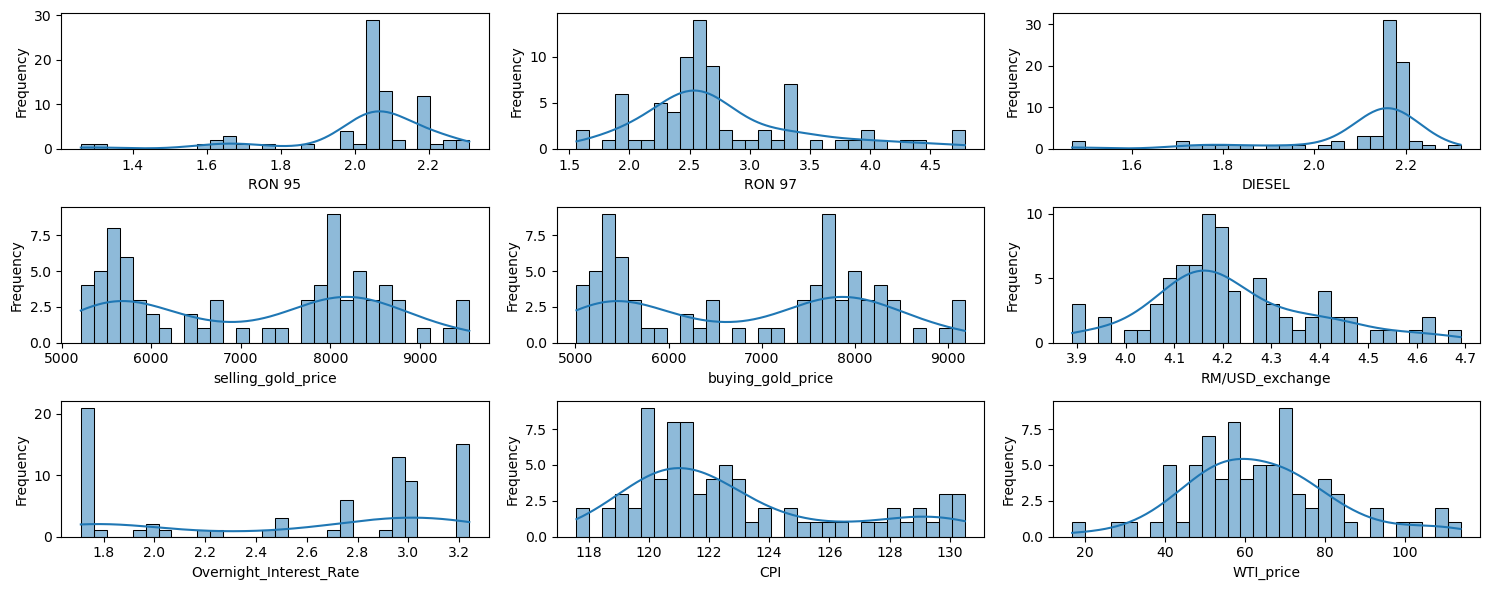

In [146]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 6))

df = merged_data_5

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Columns to plot
columns_to_plot = ['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price',
                   'buying_gold_price', 'RM/USD_exchange', 'Overnight_Interest_Rate',
                   'CPI', 'WTI_price']

for i, column in enumerate(columns_to_plot):
    # Plot the histogram
    sns.histplot(df[column], bins=30, ax=axes[i], kde=True)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [147]:
merged_data_5.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
YearMonth                  0
selling_gold_price         0
buying_gold_price          0
RM/USD_exchange            0
Overnight_Interest_Rate    0
CPI                        0
WTI_price                  0
dtype: int64

In [148]:
merged_data_5.shape

(77, 10)

In [149]:
0.7*77

53.9

In [150]:
df_train = merged_data_5[0:54]
df_test = merged_data_5[54:]

In [151]:
print(df_train.shape)
print(df_test.shape)

(54, 10)
(23, 10)


In [152]:
df_train.head()

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0    2.13    2.41    2.11   2017-03             5803.65            5566.04   
1    2.22    2.50    2.15   2017-04             5944.58            5702.42   
2    2.08    2.36    2.01   2017-05             5707.10            5480.76   
3    1.99    2.25    1.91   2017-06             5730.11            5506.28   
4    1.98    2.23    1.96   2017-07             5624.14            5406.38   

   RM/USD_exchange  Overnight_Interest_Rate    CPI  WTI_price  
0             4.44                     3.00  119.4      49.67  
1             4.41                     3.00  119.2      51.12  
2             4.31                     3.00  119.0      48.66  
3             4.28                     2.99  118.7      45.20  
4             4.29                     2.98  118.7      46.70

In [153]:
df_train.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'YearMonth', 'selling_gold_price',
       'buying_gold_price', 'RM/USD_exchange', 'Overnight_Interest_Rate',
       'CPI', 'WTI_price'],
      dtype='object')

In [154]:
df_train.set_index('YearMonth', inplace=True)

In [155]:
df_test.set_index('YearMonth', inplace=True)

In [156]:
#We apply the log to make the variance constant
df_train_log = np.log(df_train)

In [157]:
 df_train_log.head()

RON 95    RON 97    DIESEL  selling_gold_price  \
YearMonth                                                     
2017-03    0.756122  0.879627  0.746688            8.666242   
2017-04    0.797507  0.916291  0.765468            8.690235   
2017-05    0.732368  0.858662  0.698135            8.649466   
2017-06    0.688135  0.810930  0.647103            8.653490   
2017-07    0.683097  0.802002  0.672944            8.634823   

           buying_gold_price  RM/USD_exchange  Overnight_Interest_Rate  \
YearMonth                                                                
2017-03             8.624439         1.490654                 1.098612   
2017-04             8.648646         1.483875                 1.098612   
2017-05             8.608999         1.460938                 1.098612   
2017-06             8.613645         1.453953                 1.095273   
2017-07             8.595335         1.456287                 1.091923   

                CPI  WTI_price  
YearMonth                       
2017-03    4.782479   3.905401  
2017-04    4.780803   3.934176  
2017-05    4.779123   3.884857  
2017-06    4.776599   3.811097  
2017-07    4.776599   3.843744

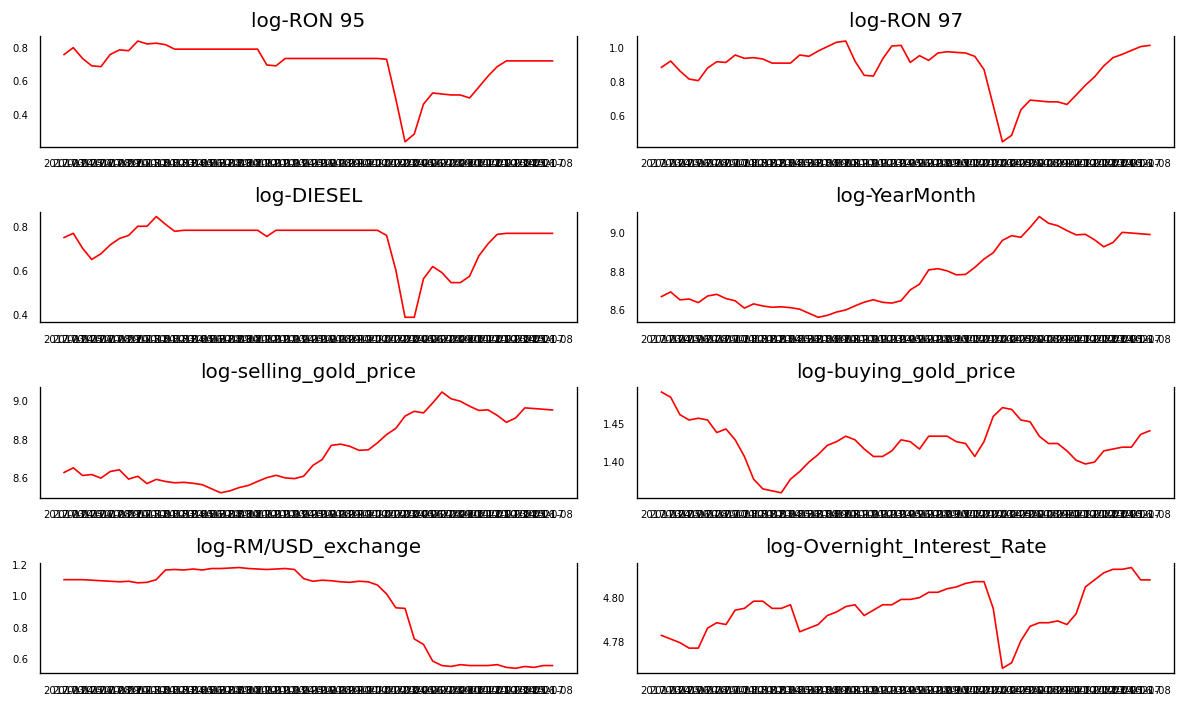

In [158]:
 fig, axes = plt.subplots(nrows=int(len(df_train.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_train_log[df_train_log.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title("log-" + df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [159]:
df_train_log.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
RM/USD_exchange            0
Overnight_Interest_Rate    0
CPI                        0
WTI_price                  0
dtype: int64

In [160]:
 #Let's difference our series once and drop NA values
df_train_log_diff = (df_train_log).diff().dropna()

In [161]:
df_train_log_diff.shape

(53, 9)

In [162]:
df_train_log_diff.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
RM/USD_exchange            0
Overnight_Interest_Rate    0
CPI                        0
WTI_price                  0
dtype: int64

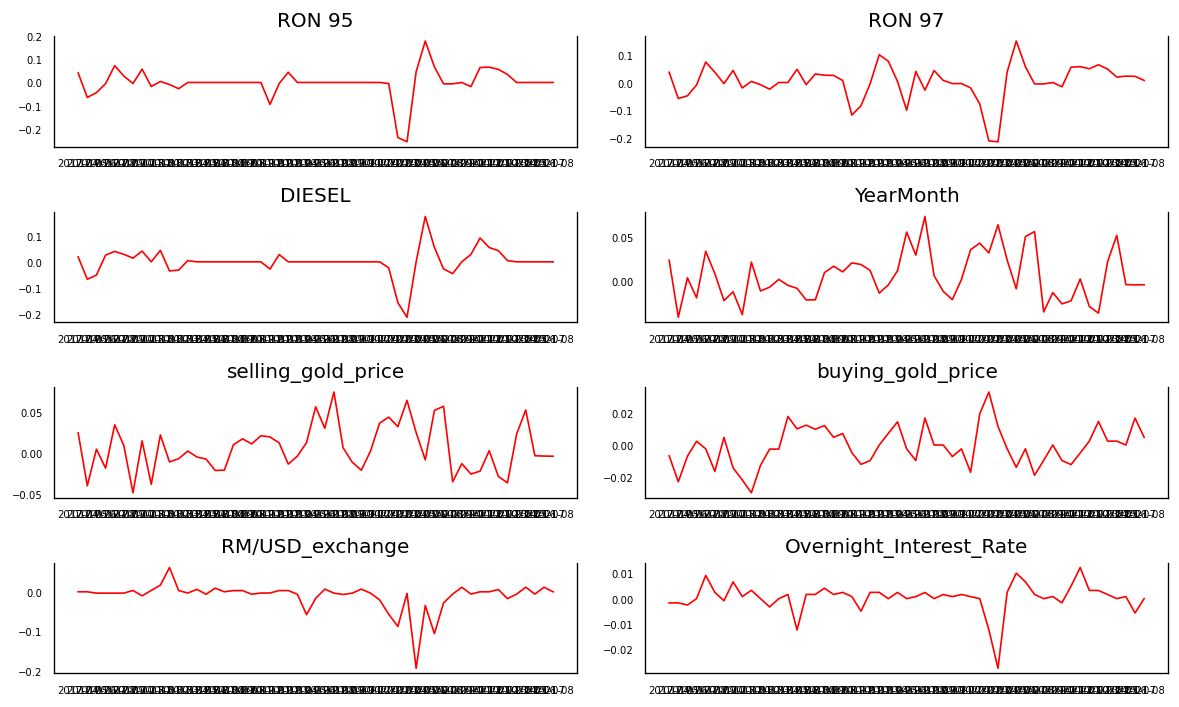

In [163]:
fig, axes = plt.subplots(nrows=int(len(df_train_log_diff.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_train_log_diff[df_train_log_diff.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [164]:
from statsmodels.tsa.stattools import acf, pacf, adfuller

def adf_test(time_series):
    result = adfuller(df_train_log_diff[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_diff.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -4.195970
p-value (RON 95): 0.000669
Critical Values:
   1%: -3.5714715250448363
   5%: -2.922629480573571
   10%: -2.5993358475635153
-----------------------------------
ADF Statistic (RON 97): -5.576371
p-value (RON 97): 0.000001
Critical Values:
   1%: -3.5656240522121956
   5%: -2.920142229157715
   10%: -2.598014675124952
-----------------------------------
ADF Statistic (DIESEL): -7.110053
p-value (DIESEL): 0.000000
Critical Values:
   1%: -3.5656240522121956
   5%: -2.920142229157715
   10%: -2.598014675124952
-----------------------------------
ADF Statistic (selling_gold_price): -5.188689
p-value (selling_gold_price): 0.000009
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
-----------------------------------
ADF Statistic (buying_gold_price): -5.575198
p-value (buying_gold_price): 0.000001
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
---------------------

In [165]:
df_train_log_diff['Overnight_Interest_Rate'] = df_train_log_diff['Overnight_Interest_Rate'].diff().dropna()

In [166]:
df_train_log_diff.head()

RON 95    RON 97    DIESEL  selling_gold_price  \
YearMonth                                                     
2017-04    0.041385  0.036664  0.018780            0.023993   
2017-05   -0.065139 -0.057629 -0.067333           -0.040769   
2017-06   -0.044233 -0.047731 -0.051031            0.004024   
2017-07   -0.005038 -0.008929  0.025841           -0.018667   
2017-08    0.073025  0.073467  0.040005            0.034193   

           buying_gold_price  RM/USD_exchange  Overnight_Interest_Rate  \
YearMonth                                                                
2017-04             0.024207        -0.006780                      NaN   
2017-05            -0.039647        -0.022937                 0.000000   
2017-06             0.004645        -0.006985                -0.003339   
2017-07            -0.018310         0.002334                -0.000011   
2017-08             0.034156        -0.002334                -0.000011   

                CPI  WTI_price  
YearMonth                       
2017-04   -0.001676   0.028775  
2017-05   -0.001679  -0.049318  
2017-06   -0.002524  -0.073760  
2017-07    0.000000   0.032647  
2017-08    0.009224   0.028706

In [167]:
df_train_log_diff.dropna(inplace=True)

In [168]:
df_train_log_diff.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price', 'buying_gold_price',
       'RM/USD_exchange', 'Overnight_Interest_Rate', 'CPI', 'WTI_price'],
      dtype='object')

In [169]:
df_train_log_diff.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
RM/USD_exchange            0
Overnight_Interest_Rate    0
CPI                        0
WTI_price                  0
dtype: int64

In [170]:
lag = int(((int(len(df_train.index))) / 3) / int(len(df_train.columns)))
lag

2

In [171]:
import statsmodels.tsa.stattools as sts


maxlag=lag

test = 'ssr_chi2test'


def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = sts.grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [172]:
 grangers_causation_matrix(df_train_log_diff, variables = df_train_log_diff.columns)

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

ve

RON 95_x  RON 97_x  DIESEL_x  selling_gold_price_x  \
RON 95_y                     1.0000    0.0099    0.2517                0.3304   
RON 97_y                     0.0781    1.0000    0.5023                0.6096   
DIESEL_y                     0.2111    0.0824    1.0000                0.1819   
selling_gold_price_y         0.3276    0.5909    0.8731                1.0000   
buying_gold_price_y          0.3285    0.4201    0.7384                0.0560   
RM/USD_exchange_y            0.7444    0.3619    0.9647                0.2645   
Overnight_Interest_Rate_y    0.0113    0.1603    0.0083                0.8078   
CPI_y                        0.0000    0.0002    0.0000                0.1627   
WTI_price_y                  0.1240    0.2644    0.2867                0.2822   

                           buying_gold_price_x  RM/USD_exchange_x  \
RON 95_y                                0.2225             0.0447   
RON 97_y                                0.5598             0.3381   
DIESEL_y                                0.1464             0.1042   
selling_gold_price_y                    0.1406             0.1641   
buying_gold_price_y                     1.0000             0.0865   
RM/USD_exchange_y                       0.3453             1.0000   
Overnight_Interest_Rate_y               0.7919             0.0718   
CPI_y                                   0.1342             0.0022   
WTI_price_y                             0.3209             0.0172   

                           Overnight_Interest_Rate_x   CPI_x  WTI_price_x  
RON 95_y                                      0.0425  0.0468       0.0001  
RON 97_y                                      0.2123  0.2059       0.0016  
DIESEL_y                                      0.0040  0.1801       0.0000  
selling_gold_price_y                          0.6891  0.7958       0.1102  
buying_gold_price_y                           0.7317  0.6496       0.1088  
RM/USD_exchange_y                             0.3143  0.7221       0.7633  
Overnight_Interest_Rate_y                     1.0000  0.0010       0.0162  
CPI_y                                         0.0892  1.0000       0.0000  
WTI_price_y                                   0.0000  0.0043       1.0000

In [173]:
from statsmodels.tsa.api import VAR

#Initiate VAR model
var_model = VAR(endog=df_train_log_diff)
res_var = var_model.select_order(maxlags=2, trend='ct')
res_var.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.table.SimpleTable'>

In [174]:
 var_model_fit = var_model.fit(maxlags=1, ic='aic')
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, May, 2024
Time:                     11:23:08
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -67.8360
Nobs:                     51.0000    HQIC:                  -69.9424
Log likelihood:           1255.46    FPE:                1.19876e-31
AIC:                     -71.2452    Det(Omega_mle):     2.39275e-32
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.001430         0.007460           -0.192           0.848
L1.RON 95                         -0.056282         0.416815           -0.135           0.893
L1.RON 

In [175]:
from statsmodels.stats.stattools import durbin_watson

dw_check_var = durbin_watson(var_model_fit.resid)

for col, val in zip(df_train_log_diff.columns, dw_check_var):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.75
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.9
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.53
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 1.69
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 1.68
----------------------------
Durbin-Watson statistic for:
RM/USD_exchange --> 1.78
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.07
----------------------------
Durbin-Watson statistic for:
CPI --> 1.62
----------------------------
Durbin-Watson statistic for:
WTI_price --> 1.78
----------------------------


In [176]:
#Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)

1


In [177]:
#Input data for forecasting
pred_input = df_train_log_diff.values[-lag_order:]
pred_input

array([[ 0.        ,  0.00732604,  0.        , -0.00377473, -0.00389907,
         0.0047506 , -0.01156082,  0.        , -0.07124505]])

In [178]:
#Forecasting
var_pred = var_model_fit.forecast(y=pred_input, steps=len(df_test))

df_var_pred = pd.DataFrame(var_pred, index = df_test.index, columns = df_train_log_diff.columns + '_1d')

df_var_pred.tail()

RON 95_1d  RON 97_1d  DIESEL_1d  selling_gold_price_1d  \
YearMonth                                                           
2023-03    -0.001426   0.002057   0.000160               0.007664   
2023-04    -0.001426   0.002056   0.000160               0.007664   
2023-05    -0.001426   0.002057   0.000160               0.007664   
2023-06    -0.001426   0.002057   0.000161               0.007664   
2023-07    -0.001426   0.002057   0.000161               0.007664   

           buying_gold_price_1d  RM/USD_exchange_1d  \
YearMonth                                             
2023-03                0.007676            0.000073   
2023-04                0.007675            0.000073   
2023-05                0.007675            0.000073   
2023-06                0.007675            0.000073   
2023-07                0.007675            0.000073   

           Overnight_Interest_Rate_1d    CPI_1d  WTI_price_1d  
YearMonth                                                      
2023-03                     -0.000205  0.000457      0.003191  
2023-04                     -0.000204  0.000457      0.003192  
2023-05                     -0.000205  0.000457      0.003194  
2023-06                     -0.000204  0.000457      0.003194  
2023-07                     -0.000204  0.000457      0.003193

In [179]:
df_var_pred.shape

(23, 9)

In [180]:
# inverting transformation: single difference
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = np.log(df_train[col].iloc[-1]) + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [181]:
df_var_pred_inv = invert_transformation(df_train, df_var_pred)
df_var_pred_inv = df_var_pred_inv.filter(regex='_forecast$',axis=1)
df_var_pred_inv = np.exp(df_var_pred_inv) 

round(df_var_pred_inv.head(), 2)

RON 95_forecast  RON 97_forecast  DIESEL_forecast  \
YearMonth                                                      
2021-09               2.01             2.67             2.12   
2021-10               1.97             2.64             2.10   
2021-11               1.96             2.63             2.09   
2021-12               1.97             2.65             2.10   
2022-01               1.97             2.66             2.10   

           selling_gold_price_forecast  buying_gold_price_forecast  \
YearMonth                                                            
2021-09                        8095.73                     7779.33   
2021-10                        8178.33                     7860.82   
2021-11                        8245.61                     7923.73   
2021-12                        8301.15                     7978.56   
2022-01                        8359.95                     8034.85   

           RM/USD_exchange_forecast  Overnight_Interest_Rate_forecast  \
YearMonth                                                               
2021-09                        4.23                              1.74   
2021-10                        4.23                              1.74   
2021-11                        4.23                              1.73   
2021-12                        4.23                              1.74   
2022-01                        4.23                              1.73   

           CPI_forecast  WTI_price_forecast  
YearMonth                                    
2021-09          122.46               65.23  
2021-10          122.32               63.74  
2021-11          122.33               64.54  
2021-12          122.40               65.24  
2022-01          122.48               65.70

In [182]:
from sklearn import metrics

var_mape = metrics.mean_absolute_percentage_error(df_test, df_var_pred_inv)

var_model_accuracy = 1 - var_mape
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.904


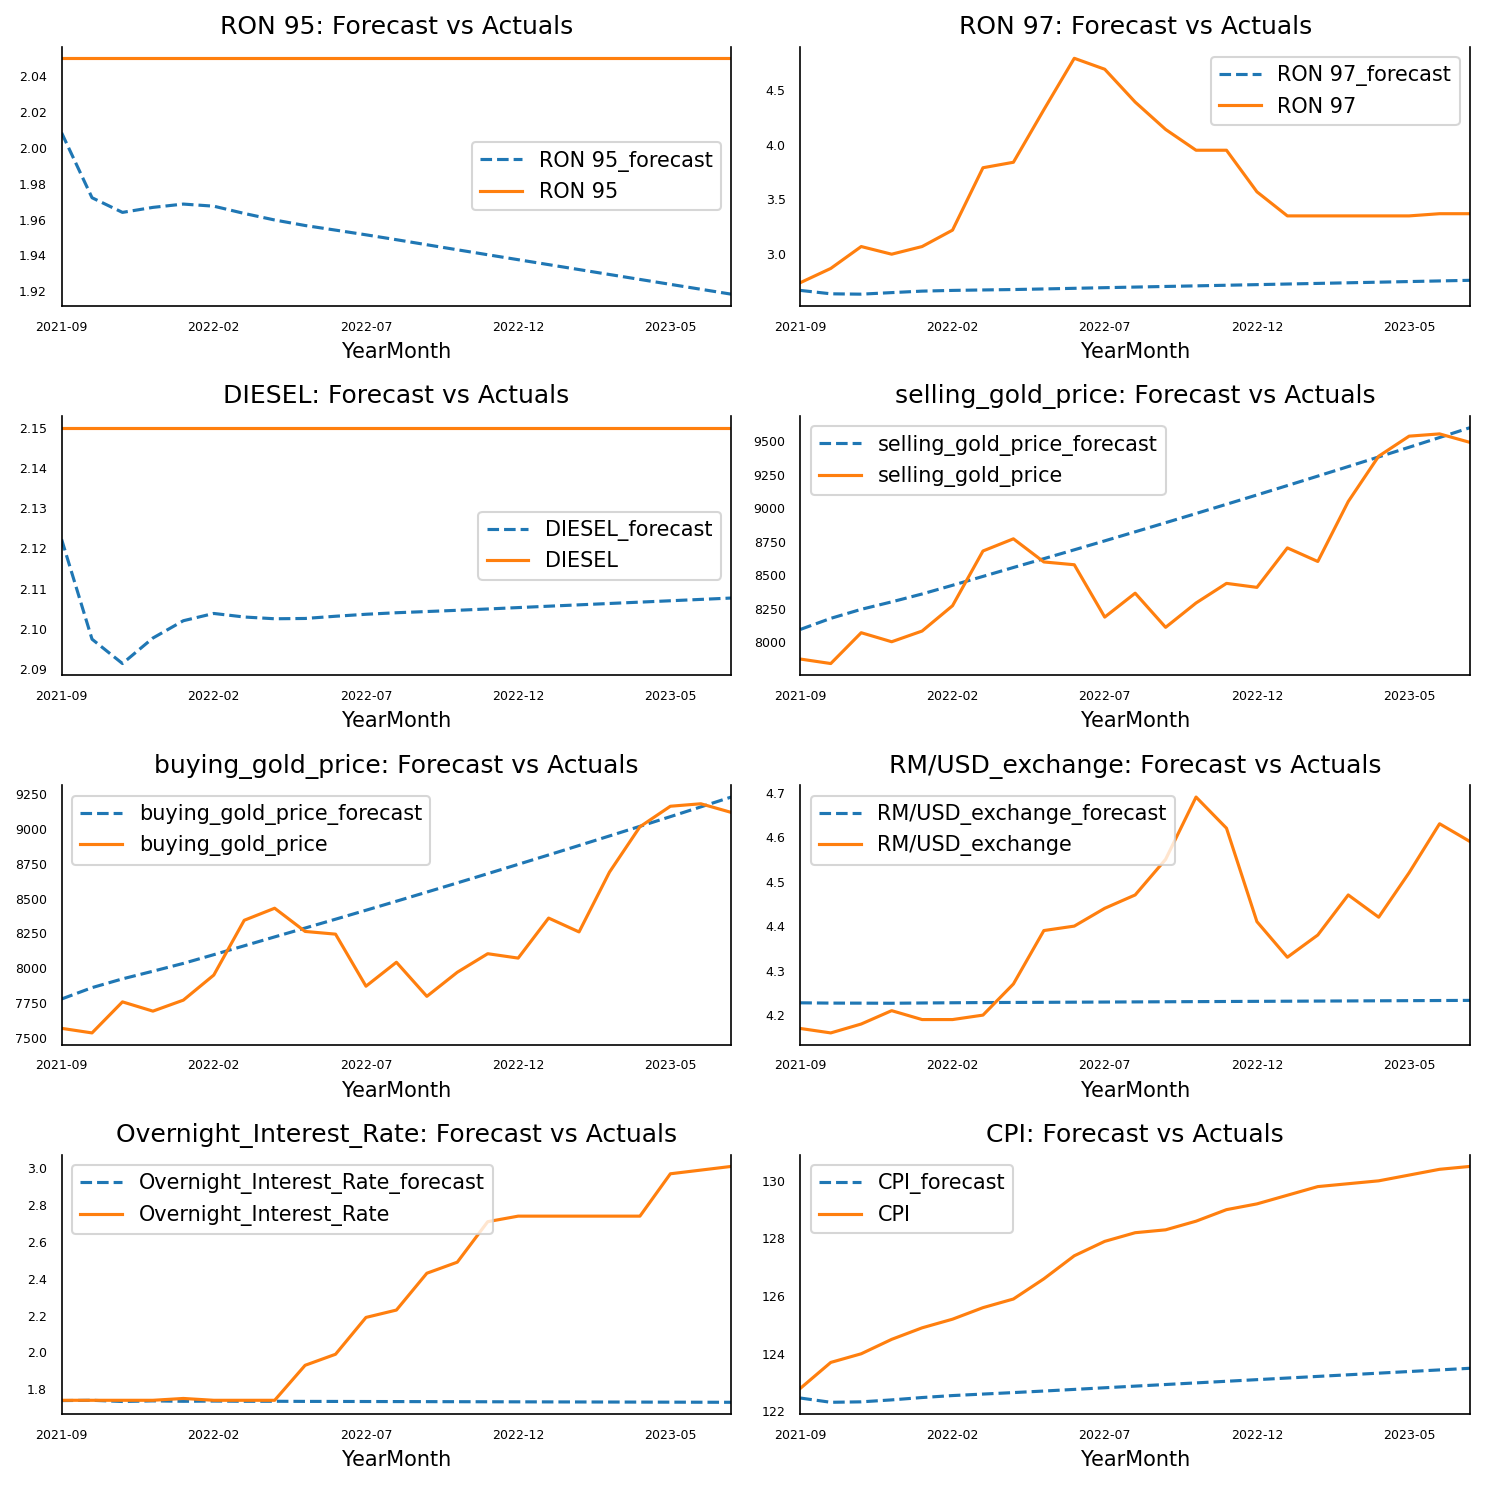

In [183]:
fig, axes = plt.subplots(nrows=int(len(df_test.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_test.columns, axes.flatten())):
    df_var_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--').autoscale(axis='x',tight=True)
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [184]:
#####################part 2##########################

In [185]:
merged_data_5

RON 95  RON 97  DIESEL YearMonth  selling_gold_price  buying_gold_price  \
0     2.13    2.41    2.11   2017-03             5803.65            5566.04   
1     2.22    2.50    2.15   2017-04             5944.58            5702.42   
2     2.08    2.36    2.01   2017-05             5707.10            5480.76   
3     1.99    2.25    1.91   2017-06             5730.11            5506.28   
4     1.98    2.23    1.96   2017-07             5624.14            5406.38   
..     ...     ...     ...       ...                 ...                ...   
72    2.05    3.35    2.15   2023-03             9048.91            8689.61   
73    2.05    3.35    2.15   2023-04             9386.67            9014.83   
74    2.05    3.35    2.15   2023-05             9536.10            9162.00   
75    2.05    3.37    2.15   2023-06             9552.95            9179.75   
76    2.05    3.37    2.15   2023-07             9489.53            9117.66   

    RM/USD_exchange  Overnight_Interest_Rate    CPI  WTI_price  
0              4.44                     3.00  119.4      49.67  
1              4.41                     3.00  119.2      51.12  
2              4.31                     3.00  119.0      48.66  
3              4.28                     2.99  118.7      45.20  
4              4.29                     2.98  118.7      46.70  
..              ...                      ...    ...        ...  
72             4.47                     2.74  129.9      73.37  
73             4.42                     2.74  130.0      79.44  
74             4.52                     2.97  130.2      71.74  
75             4.63                     2.99  130.4      70.37  
76             4.59                     3.01  130.5      73.94  

[77 rows x 10 columns]

In [186]:
merged_data_5.set_index('YearMonth', inplace=True)

In [187]:
df_train_1 = merged_data_5[0:54]
df_test_1 = merged_data_5[54:]

In [188]:
df_train_1.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price', 'buying_gold_price',
       'RM/USD_exchange', 'Overnight_Interest_Rate', 'CPI', 'WTI_price'],
      dtype='object')

In [189]:
df_test_1.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price', 'buying_gold_price',
       'RM/USD_exchange', 'Overnight_Interest_Rate', 'CPI', 'WTI_price'],
      dtype='object')

In [190]:
df_train_1.columns = df_train_1.columns.str.strip()

In [191]:
df_train_1 = df_train_1.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'])

In [192]:
df_test_1.columns = df_test_1.columns.str.strip()

In [193]:
df_test_1 = df_test_1.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'])

In [194]:
#We apply the log to make the variance constant
df_train_log_1 = np.log(df_train_1)

In [195]:
df_train_log_1

RON 95    RON 97    DIESEL  selling_gold_price  \
YearMonth                                                     
2017-03    0.756122  0.879627  0.746688            8.666242   
2017-04    0.797507  0.916291  0.765468            8.690235   
2017-05    0.732368  0.858662  0.698135            8.649466   
2017-06    0.688135  0.810930  0.647103            8.653490   
2017-07    0.683097  0.802002  0.672944            8.634823   
2017-08    0.756122  0.875469  0.712950            8.669016   
2017-09    0.783902  0.912283  0.741937            8.677910   
2017-10    0.779325  0.908259  0.756122            8.656035   
2017-11    0.837248  0.951658  0.797507            8.644266   
2017-12    0.819780  0.932164  0.797507            8.606494   
2018-01    0.824175  0.936093  0.841567            8.628357   
2018-02    0.815365  0.928219  0.806476            8.617467   
2018-03    0.788457  0.904218  0.774727            8.610931   
2018-04    0.788457  0.904218  0.779325            8.613212   
2018-05    0.788457  0.904218  0.779325            8.608769   
2018-06    0.788457  0.951658  0.779325            8.600909   
2018-07    0.788457  0.943906  0.779325            8.579869   
2018-08    0.788457  0.974560  0.779325            8.558966   
2018-09    0.788457  1.000632  0.779325            8.568948   
2018-10    0.788457  1.026042  0.779325            8.586215   
2018-11    0.788457  1.033184  0.779325            8.597026   
2018-12    0.788457  0.916291  0.779325            8.618097   
2019-01    0.693147  0.832909  0.751416            8.637310   
2019-02    0.688135  0.828552  0.779325            8.649748   
2019-03    0.732368  0.928219  0.779325            8.636440   
2019-04    0.732368  1.004302  0.779325            8.632525   
2019-05    0.732368  1.007958  0.779325            8.644680   
2019-06    0.732368  0.908259  0.779325            8.700662   
2019-07    0.732368  0.947789  0.779325            8.730514   
2019-08    0.732368  0.920283  0.779325            8.804204   
2019-09    0.732368  0.963174  0.779325            8.810733   
2019-10    0.732368  0.970779  0.779325            8.799428   
2019-11    0.732368  0.966984  0.779325            8.778751   
2019-12    0.732368  0.963174  0.779325            8.781018   
2020-01    0.732368  0.943906  0.779325            8.817037   
2020-02    0.727549  0.867100  0.756122            8.860506   
2020-03    0.488580  0.657520  0.598837            8.892867   
2020-04    0.231112  0.444686  0.385262            8.957159   
2020-05    0.277632  0.482426  0.385262            8.981512   
2020-06    0.457425  0.631272  0.559616            8.973032   
2020-07    0.524729  0.688135  0.615186            9.023934   
2020-08    0.518794  0.683097  0.587787            9.080502   
2020-09    0.512824  0.678034  0.542324            9.045876   
2020-10    0.512824  0.678034  0.542324            9.033154   
2020-11    0.494696  0.662688  0.570980            9.007648   
2020-12    0.559616  0.717840  0.662688            8.985633   
2021-01    0.625938  0.774727  0.717840            8.988414   
2021-02    0.683097  0.824175  0.760806            8.959894   
2021-03    0.717840  0.887891  0.765468            8.923870   
2021-04    0.717840  0.936093  0.765468            8.946307   
2021-05    0.717840  0.955511  0.765468            8.998639   
2021-06    0.717840  0.978326  0.765468            8.995084   
2021-07    0.717840  1.000632  0.765468            8.991140   
2021-08    0.717840  1.007958  0.765468            8.987366   

           buying_gold_price  Overnight_Interest_Rate  
YearMonth                                              
2017-03             8.624439                 1.098612  
2017-04             8.648646                 1.098612  
2017-05             8.608999                 1.098612  
2017-06             8.613645                 1.095273  
2017-07             8.595335                 1.091923  
2017-08             8.629491                 1.088562  
2017-09             8.638370        

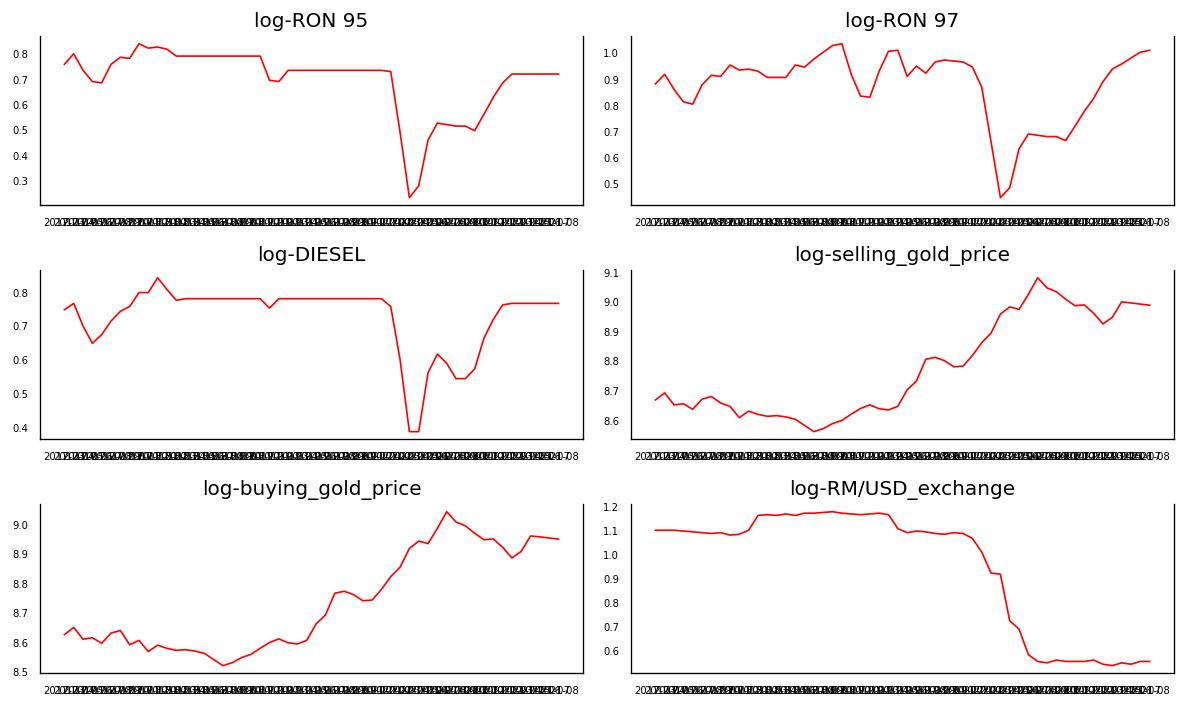

In [196]:
 fig, axes = plt.subplots(nrows=int(len(df_train_log_1.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_train_log_1[df_train_log_1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title("log-" + df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [197]:
df_train_log_1.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [198]:
 #Let's difference our series once and drop NA values
df_train_log_diff_1 = (df_train_log_1).diff().dropna()

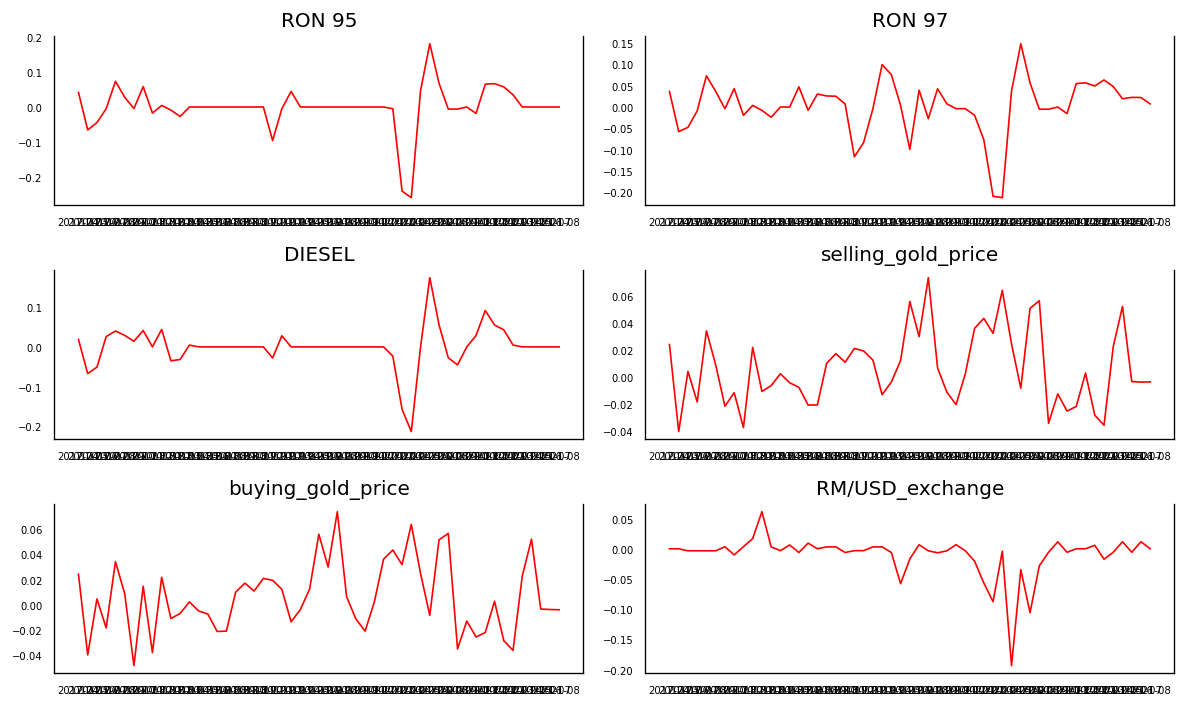

In [199]:
fig, axes = plt.subplots(nrows=int(len(df_train_log_diff_1.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_train_log_diff_1[df_train_log_diff_1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [200]:
df_train_log_diff_1.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [201]:
lag = int(((int(len(df_train_1.index))) / 3) / int(len(df_train_1.columns)))
lag

3

In [202]:
import statsmodels.tsa.stattools as sts


maxlag=lag

test = 'ssr_chi2test'


def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = sts.grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [203]:
 grangers_causation_matrix(df_train_log_diff_1, variables = df_train_log_diff_1.columns)

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

ve

RON 95_x  RON 97_x  DIESEL_x  selling_gold_price_x  \
RON 95_y                     1.0000    0.0093    0.2905                0.3025   
RON 97_y                     0.0583    1.0000    0.2502                0.5904   
DIESEL_y                     0.2100    0.0787    1.0000                0.1377   
selling_gold_price_y         0.0006    0.4567    0.0010                1.0000   
buying_gold_price_y          0.0063    0.3242    0.0027                0.0625   
Overnight_Interest_Rate_y    0.0034    0.0152    0.0010                0.0644   

                           buying_gold_price_x  Overnight_Interest_Rate_x  
RON 95_y                                0.2012                     0.1345  
RON 97_y                                0.4629                     0.2104  
DIESEL_y                                0.1103                     0.0093  
selling_gold_price_y                    0.1412                     0.0707  
buying_gold_price_y                     1.0000                     0.0786  
Overnight_Interest_Rate_y               0.0860                     1.0000

In [204]:
from statsmodels.tsa.api import VAR

#Initiate VAR model
var_model = VAR(endog=df_train_log_diff_1)
res_var = var_model.select_order(maxlags=3, trend='ct')
res_var.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.table.SimpleTable'>

In [205]:
 var_model_fit = var_model.fit(maxlags=3, ic='aic')
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, May, 2024
Time:                     11:23:12
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -41.3652
Nobs:                     50.0000    HQIC:                  -44.0646
Log likelihood:           831.435    FPE:                1.76433e-20
AIC:                     -45.7246    Det(Omega_mle):     2.55449e-21
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.008587         0.006827           -1.258           0.208
L1.RON 95                         -0.791779         0.362296           -2.185           0.029
L1.RON 

In [206]:
from statsmodels.stats.stattools import durbin_watson

dw_check_var = durbin_watson(var_model_fit.resid)

for col, val in zip(df_train_log_diff.columns, dw_check_var):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 2.0
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.93
----------------------------
Durbin-Watson statistic for:
DIESEL --> 2.15
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 1.88
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 1.82
----------------------------
Durbin-Watson statistic for:
RM/USD_exchange --> 2.38
----------------------------


In [207]:
#Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)

3


In [208]:
#Input data for forecasting
pred_input = df_train_log_diff_1.values[-lag_order:]
pred_input

array([[ 0.        ,  0.02281468,  0.        , -0.00355423, -0.00334743,
        -0.00579712],
       [ 0.        ,  0.02230576,  0.        , -0.0039441 , -0.00371874,
         0.01156082],
       [ 0.        ,  0.00732604,  0.        , -0.00377473, -0.00389907,
         0.        ]])

In [209]:
#Forecasting
var_pred = var_model_fit.forecast(y=pred_input, steps=len(df_test_1))

df_var_pred = pd.DataFrame(var_pred, index = df_test_1.index, columns = df_train_log_diff_1.columns + '_1d')

df_var_pred.tail()

RON 95_1d  RON 97_1d  DIESEL_1d  selling_gold_price_1d  \
YearMonth                                                           
2023-03     0.001465   0.004494   0.003303               0.006102   
2023-04     0.000859   0.004379   0.002426               0.005914   
2023-05     0.000082   0.003910   0.001637               0.005514   
2023-06    -0.000028   0.003657   0.001724               0.005369   
2023-07     0.000489   0.003814   0.002388               0.005555   

           buying_gold_price_1d  Overnight_Interest_Rate_1d  
YearMonth                                                    
2023-03                0.006097                   -0.009192  
2023-04                0.005893                   -0.009049  
2023-05                0.005506                   -0.009036  
2023-06                0.005392                   -0.009163  
2023-07                0.005585                   -0.009244

In [210]:
# inverting transformation: single difference
def invert_transformation(df_train_1, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train_1.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = np.log(df_train_1[col].iloc[-1]) + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [211]:
df_var_pred_inv = invert_transformation(df_train_1, df_var_pred)
df_var_pred_inv = df_var_pred_inv.filter(regex='_forecast$',axis=1)
df_var_pred_inv = np.exp(df_var_pred_inv) 

round(df_var_pred_inv.head(), 2)

RON 95_forecast  RON 97_forecast  DIESEL_forecast  \
YearMonth                                                      
2021-09               2.07             2.76             2.18   
2021-10               2.09             2.77             2.21   
2021-11               2.08             2.77             2.21   
2021-12               2.06             2.77             2.20   
2022-01               2.05             2.78             2.19   

           selling_gold_price_forecast  buying_gold_price_forecast  \
YearMonth                                                            
2021-09                        8023.31                     7710.00   
2021-10                        8062.51                     7752.66   
2021-11                        8113.42                     7797.82   
2021-12                        8137.56                     7821.65   
2022-01                        8131.95                     7814.68   

           Overnight_Interest_Rate_forecast  
YearMonth                                    
2021-09                                1.74  
2021-10                                1.74  
2021-11                                1.74  
2021-12                                1.74  
2022-01                                1.73

In [212]:
from sklearn import metrics

var_mape = metrics.mean_absolute_percentage_error(df_test_1, df_var_pred_inv)

var_model_accuracy = 1 - var_mape
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.908


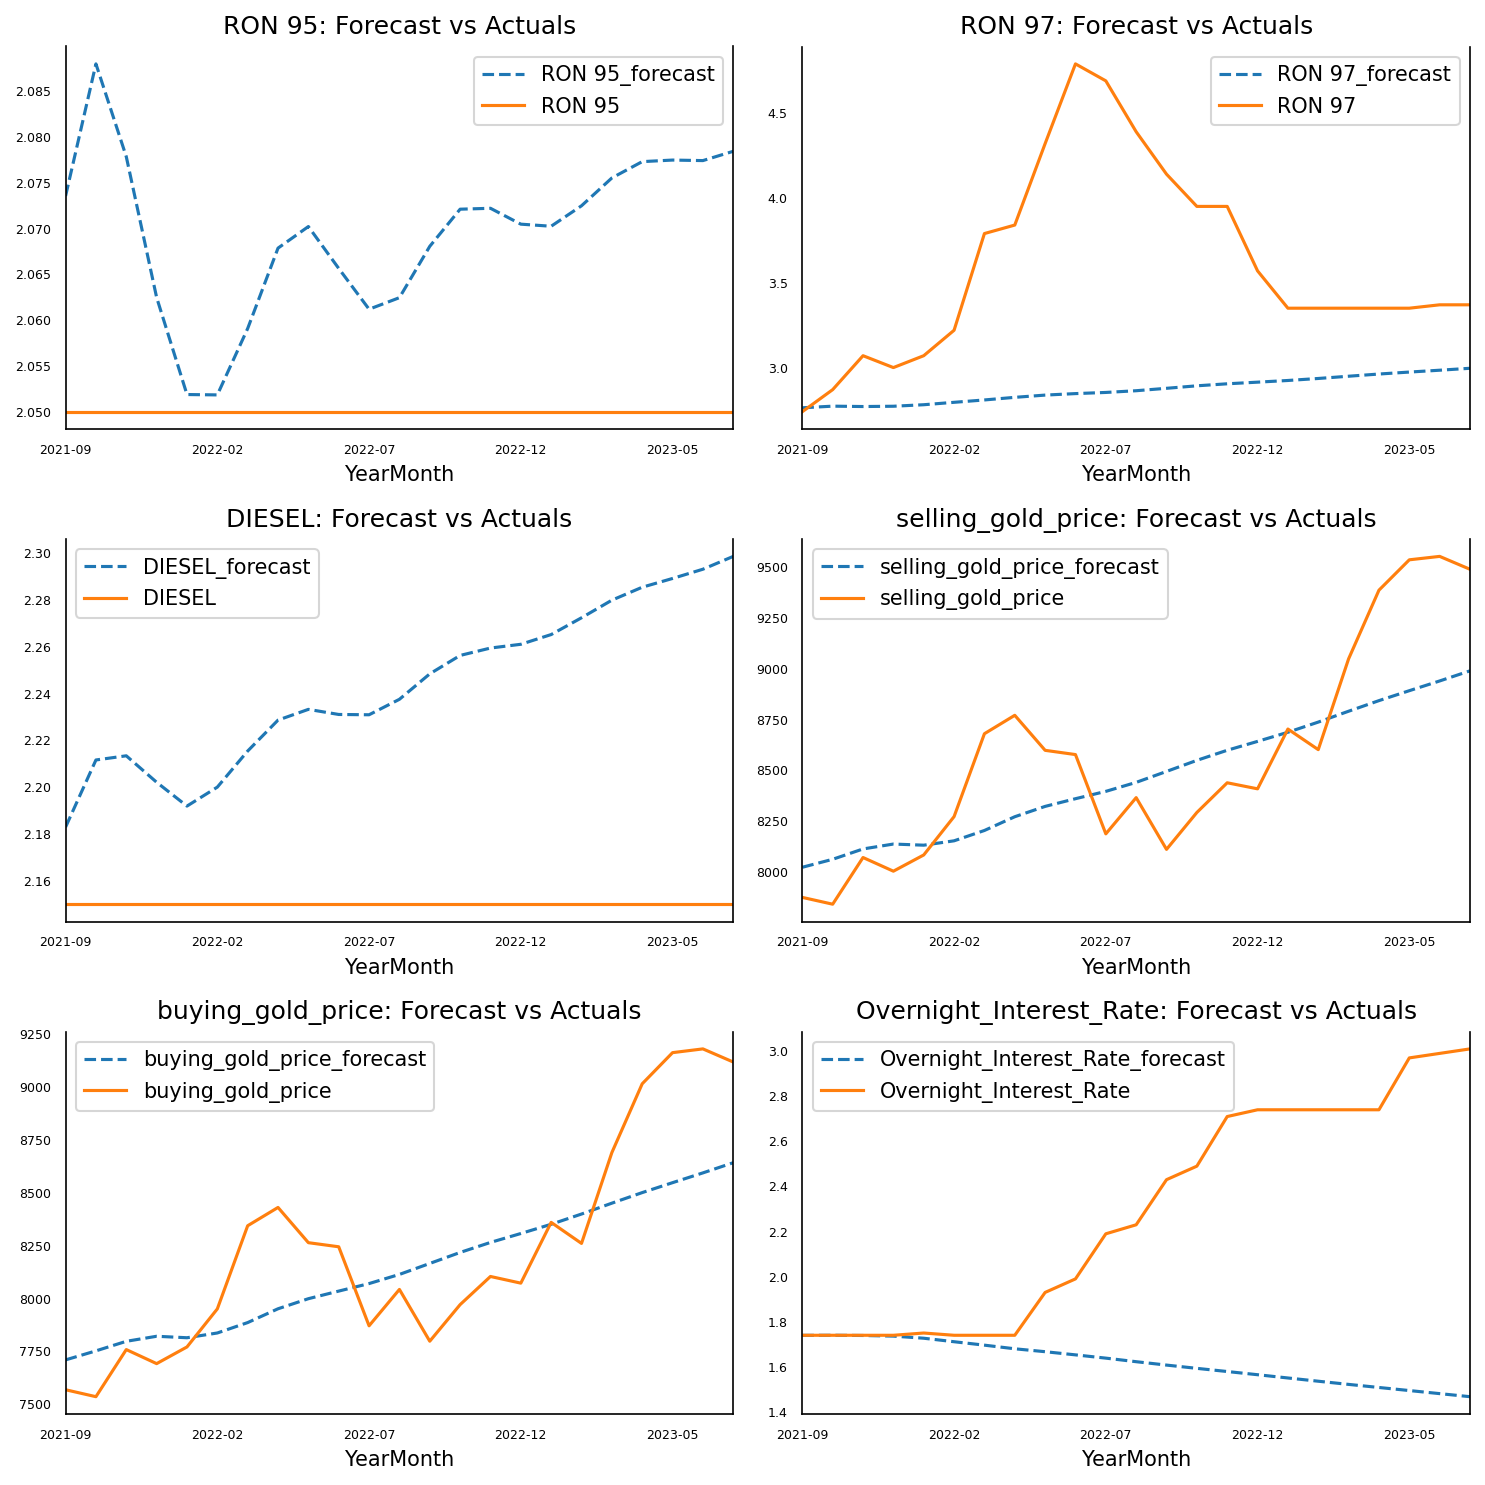

In [213]:
fig, axes = plt.subplots(nrows=int(len(df_test_1.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_test_1.columns, axes.flatten())):
    df_var_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--').autoscale(axis='x',tight=True)
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [214]:
df_test_1.head()

RON 95  RON 97  DIESEL  selling_gold_price  buying_gold_price  \
YearMonth                                                                  
2021-09      2.05    2.74    2.15             7875.05            7568.89   
2021-10      2.05    2.87    2.15             7841.60            7536.10   
2021-11      2.05    3.07    2.15             8071.29            7758.76   
2021-12      2.05    3.00    2.15             8004.00            7692.36   
2022-01      2.05    3.07    2.15             8083.82            7771.18   

           Overnight_Interest_Rate  
YearMonth                           
2021-09                       1.74  
2021-10                       1.74  
2021-11                       1.74  
2021-12                       1.74  
2022-01                       1.75

In [215]:
merged_data_5.tail()

RON 95  RON 97  DIESEL  selling_gold_price  buying_gold_price  \
YearMonth                                                                  
2023-03      2.05    3.35    2.15             9048.91            8689.61   
2023-04      2.05    3.35    2.15             9386.67            9014.83   
2023-05      2.05    3.35    2.15             9536.10            9162.00   
2023-06      2.05    3.37    2.15             9552.95            9179.75   
2023-07      2.05    3.37    2.15             9489.53            9117.66   

           RM/USD_exchange  Overnight_Interest_Rate    CPI  WTI_price  
YearMonth                                                              
2023-03               4.47                     2.74  129.9      73.37  
2023-04               4.42                     2.74  130.0      79.44  
2023-05               4.52                     2.97  130.2      71.74  
2023-06               4.63                     2.99  130.4      70.37  
2023-07               4.59                     3.01  130.5      73.94

In [216]:
######################## modelling #########################

In [217]:
fc_window = ['2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', 
             '2024-03', '2024-04', '2024-05', '2024-06', '2024-07']

In [218]:
df_log = np.log(merged_data_5)
df_log_diff = df_log.diff().dropna()

In [219]:
def adf_test(time_series):
    result = adfuller(df_log_diff[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_log_diff.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -5.178023
p-value (RON 95): 0.000010
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677
-----------------------------------
ADF Statistic (RON 97): -5.755584
p-value (RON 97): 0.000001
Critical Values:
   1%: -3.5219803175527606
   5%: -2.9014701097664504
   10%: -2.58807215485756
-----------------------------------
ADF Statistic (DIESEL): -5.535820
p-value (DIESEL): 0.000002
Critical Values:
   1%: -3.5232835753964475
   5%: -2.902030597326081
   10%: -2.5883710883843123
-----------------------------------
ADF Statistic (selling_gold_price): -6.849297
p-value (selling_gold_price): 0.000000
Critical Values:
   1%: -3.520713130074074
   5%: -2.9009249540740742
   10%: -2.5877813777777776
-----------------------------------
ADF Statistic (buying_gold_price): -7.209869
p-value (buying_gold_price): 0.000000
Critical Values:
   1%: -3.520713130074074
   5%: -2.9009249540740742
   10%: -2.5877813777777776
----------------

In [220]:
merged_copy=merged_data_5.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'])

In [221]:
df_log_diff = df_log_diff.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'])

In [222]:
lag_fc = int(((int(len(merged_copy.index))) / 3) / int(len(merged_copy.columns)))
lag_fc

4

In [223]:
#Initiate VAR model
var_model_fc = VAR(endog=df_log_diff)
res_var_fc = var_model_fc.select_order(maxlags=lag_fc, trend='ct')
res_var_fc.summary() 

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.table.SimpleTable'>

In [224]:
#Fitting the model
var_model_fc_fit = var_model_fc.fit(maxlags=3, ic='aic')
var_model_fc_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, May, 2024
Time:                     11:23:12
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -42.5309
Nobs:                     73.0000    HQIC:                  -44.6824
Log likelihood:           1175.44    FPE:                1.01759e-20
AIC:                     -46.1078    Det(Omega_mle):     2.53969e-21
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.001237         0.004931            0.251           0.802
L1.RON 95                         -0.047171         0.268073           -0.176           0.860
L1.RON 

In [225]:
 #Checking for auto-correlation of residuals
dw_check_var_fc = durbin_watson(var_model_fc_fit.resid)

for col, val in zip(df_log_diff.columns, dw_check_var_fc):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.85
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.9
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.98
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.04
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 1.99
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.15
----------------------------


In [226]:
 #Get the lag order
lag_order_fc = var_model_fc_fit.k_ar
print(lag_order_fc)

3


In [227]:
 #Input data for forecasting
fc_input = df_log_diff.values[-lag_order_fc:]
fc_input

array([[ 0.        ,  0.        ,  0.        ,  0.015794  ,  0.0161935 ,
         0.08060403],
       [ 0.        ,  0.0059524 ,  0.        ,  0.00176541,  0.00193548,
         0.00671143],
       [ 0.        ,  0.        ,  0.        , -0.00666092, -0.00678678,
         0.00666669]])

In [228]:
#Making forecasts
var_fc = var_model_fc_fit.forecast(y=fc_input, steps=int(len(fc_window)))

df_var_fc = pd.DataFrame(var_fc, index = fc_window, columns = df_log_diff.columns + '_1d')

df_var_fc.tail()

RON 95_1d  RON 97_1d  DIESEL_1d  selling_gold_price_1d  \
2024-03   0.000237   0.010178   0.001195               0.002755   
2024-04   0.004936   0.010694   0.007256               0.007586   
2024-05   0.003365   0.008255   0.004727               0.008846   
2024-06   0.000215   0.006289   0.000479               0.007629   
2024-07  -0.001608   0.005913  -0.001354               0.005221   

         buying_gold_price_1d  Overnight_Interest_Rate_1d  
2024-03              0.002714                   -0.002508  
2024-04              0.007725                   -0.002954  
2024-05              0.008864                   -0.000408  
2024-06              0.007512                    0.000737  
2024-07              0.005196                    0.001736

In [229]:
 #Un-transform our series to reflect actual values 
df_var_fc_inv = invert_transformation(merged_copy, df_var_fc)
df_var_fc_inv = df_var_fc_inv.filter(regex='_forecast$',axis=1)
df_var_fc_inv = np.exp(df_var_fc_inv) 

round(df_var_fc_inv.head(), 2)

RON 95_forecast  RON 97_forecast  DIESEL_forecast  \
2023-08             1.96             3.22             2.07   
2023-09             1.87             3.10             2.01   
2023-10             1.88             3.10             2.02   
2023-11             1.92             3.16             2.06   
2023-12             1.93             3.20             2.08   

         selling_gold_price_forecast  buying_gold_price_forecast  \
2023-08                      9549.96                     9184.15   
2023-09                      9696.38                     9315.11   
2023-10                      9791.53                     9410.43   
2023-11                      9881.95                     9495.18   
2023-12                     10019.73                     9626.83   

         Overnight_Interest_Rate_forecast  
2023-08                              3.03  
2023-09                              3.01  
2023-10                              2.98  
2023-11                              2.94  
2023-12                              2.92

In [230]:
df_var_fc_inv

RON 95_forecast  RON 97_forecast  DIESEL_forecast  \
2023-08         1.956668         3.217058         2.073309   
2023-09         1.874932         3.100601         2.007442   
2023-10         1.882684         3.102797         2.017354   
2023-11         1.921033         3.163343         2.055389   
2023-12         1.932498         3.203388         2.075088   
2024-01         1.914811         3.207909         2.056012   
2024-02         1.900121         3.220825         2.037422   
2024-03         1.900571         3.253776         2.039857   
2024-04         1.909975         3.288760         2.054713   
2024-05         1.916413         3.316022         2.064448   
2024-06         1.916826         3.336943         2.065436   
2024-07         1.913746         3.356733         2.062641   

         selling_gold_price_forecast  buying_gold_price_forecast  \
2023-08                  9549.955306                 9184.145793   
2023-09                  9696.379791                 9315.109513   
2023-10                  9791.525197                 9410.433495   
2023-11                  9881.950208                 9495.184034   
2023-12                 10019.731875                 9626.827152   
2024-01                 10124.239702                 9725.672575   
2024-02                 10181.504955                 9783.181958   
2024-03                 10209.591716                 9809.769999   
2024-04                 10287.333231                 9885.840659   
2024-05                 10378.737905                 9973.855770   
2024-06                 10458.220841                10049.066469   
2024-07                 10512.970108                10101.414902   

         Overnight_Interest_Rate_forecast  
2023-08                          3.026620  
2023-09                          3.005095  
2023-10                          2.979646  
2023-11                          2.942505  
2023-12                          2.918275  
2024-01                          2.908422  
2024-02                          2.896849  
2024-03                          2.889591  
2024-04                          2.881068  
2024-05                          2.879893  
2024-06                          2.882018  
2024-07                          2.887025

In [231]:
#First, we create a copy of our forecast data set
df_var_fc_plot = df_var_fc_inv.copy()

#Let's remove the "_forecast" suffix from our columns names
df_var_fc_plot.columns = df_var_fc_plot.columns.str[:-9]

# Append df_var_fc_plot to merged_copy using pd.concat()
var_fc_plot = pd.concat([merged_copy, df_var_fc_plot])

# Alternatively, you can use the .append() method directly on merged_copy
# var_fc_plot = merged_copy.append(df_var_fc_plot)

var_fc_plot.index = pd.to_datetime(var_fc_plot.index)
var_fc_plot.tail(8)


RON 95    RON 97    DIESEL  selling_gold_price  \
2023-12-01  1.932498  3.203388  2.075088        10019.731875   
2024-01-01  1.914811  3.207909  2.056012        10124.239702   
2024-02-01  1.900121  3.220825  2.037422        10181.504955   
2024-03-01  1.900571  3.253776  2.039857        10209.591716   
2024-04-01  1.909975  3.288760  2.054713        10287.333231   
2024-05-01  1.916413  3.316022  2.064448        10378.737905   
2024-06-01  1.916826  3.336943  2.065436        10458.220841   
2024-07-01  1.913746  3.356733  2.062641        10512.970108   

            buying_gold_price  Overnight_Interest_Rate  
2023-12-01        9626.827152                 2.918275  
2024-01-01        9725.672575                 2.908422  
2024-02-01        9783.181958                 2.896849  
2024-03-01        9809.769999                 2.889591  
2024-04-01        9885.840659                 2.881068  
2024-05-01        9973.855770                 2.879893  
2024-06-01       10049.066469                 2.882018  
2024-07-01       10101.414902                 2.887025

In [232]:
var_fc_plot

RON 95    RON 97    DIESEL  selling_gold_price  \
2017-03-01  2.130000  2.410000  2.110000         5803.650000   
2017-04-01  2.220000  2.500000  2.150000         5944.580000   
2017-05-01  2.080000  2.360000  2.010000         5707.100000   
2017-06-01  1.990000  2.250000  1.910000         5730.110000   
2017-07-01  1.980000  2.230000  1.960000         5624.140000   
...              ...       ...       ...                 ...   
2024-03-01  1.900571  3.253776  2.039857        10209.591716   
2024-04-01  1.909975  3.288760  2.054713        10287.333231   
2024-05-01  1.916413  3.316022  2.064448        10378.737905   
2024-06-01  1.916826  3.336943  2.065436        10458.220841   
2024-07-01  1.913746  3.356733  2.062641        10512.970108   

            buying_gold_price  Overnight_Interest_Rate  
2017-03-01        5566.040000                 3.000000  
2017-04-01        5702.420000                 3.000000  
2017-05-01        5480.760000                 3.000000  
2017-06-01        5506.280000                 2.990000  
2017-07-01        5406.380000                 2.980000  
...                       ...                      ...  
2024-03-01        9809.769999                 2.889591  
2024-04-01        9885.840659                 2.881068  
2024-05-01        9973.855770                 2.879893  
2024-06-01       10049.066469                 2.882018  
2024-07-01       10101.414902                 2.887025  

[89 rows x 6 columns]

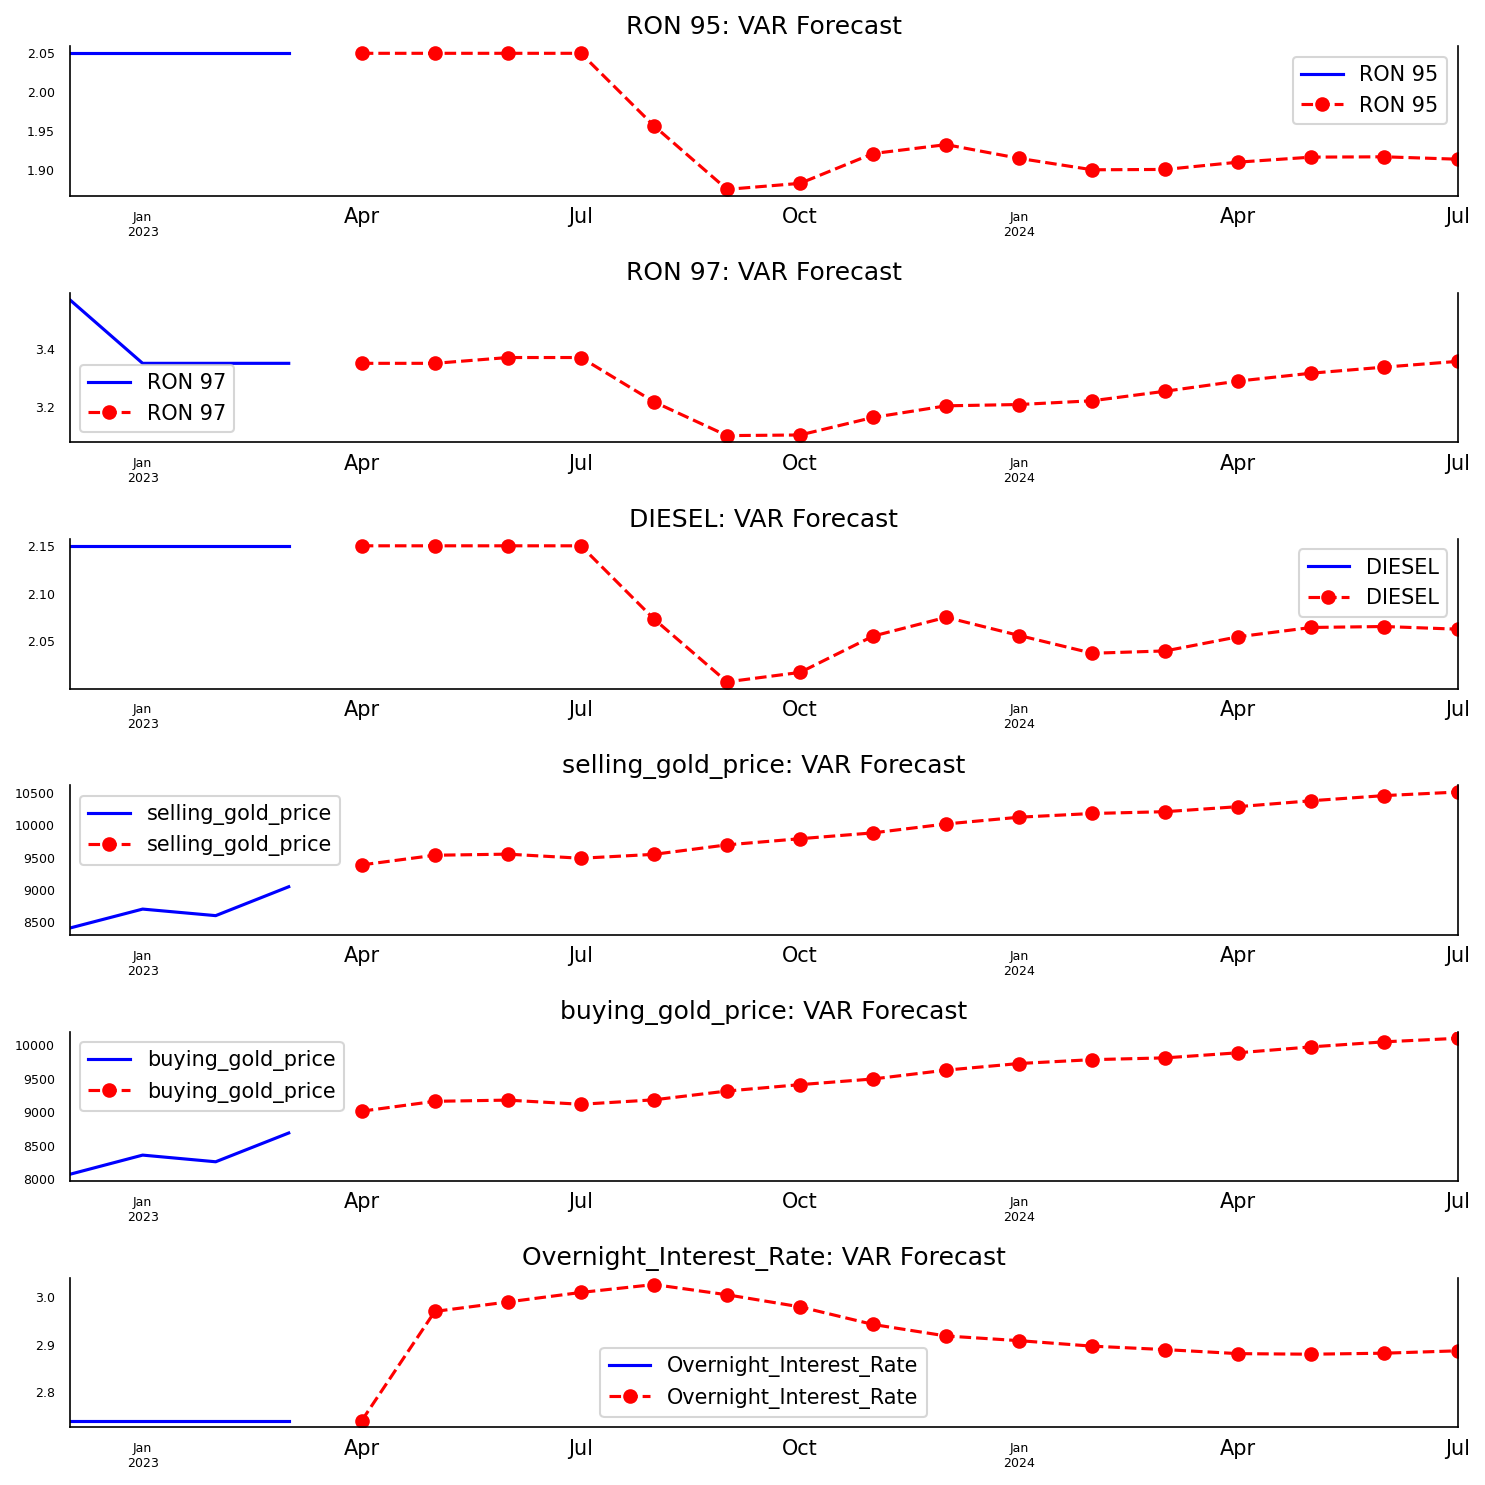

In [233]:
fig, axes = plt.subplots(nrows=int(len(var_fc_plot.columns)/1), ncols=1, dpi=150, figsize=(10,10))

# Determine the index positions corresponding to the dates in fc_window
start_index = var_fc_plot.index.get_loc('2023-08-01')
end_index = var_fc_plot.index.get_loc('2024-07-01')

for i, (col,ax) in enumerate(zip(var_fc_plot.columns, axes.flatten())):
    # Plot historical data
    var_fc_plot[col].iloc[start_index-8:start_index-4].plot(legend=True, ax=ax, color='b')
    
    # Plot forecasted data
    var_fc_plot[col].iloc[start_index-4:end_index+1].plot(legend=True, ax=ax, marker='o', color='r', linestyle='--')
    
    # Set title
    ax.set_title(col + ": VAR Forecast")
    
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Make top spine transparent
    ax.spines["top"].set_alpha(0)
    
    # Set tick label size
    ax.tick_params(labelsize=6)

plt.tight_layout()


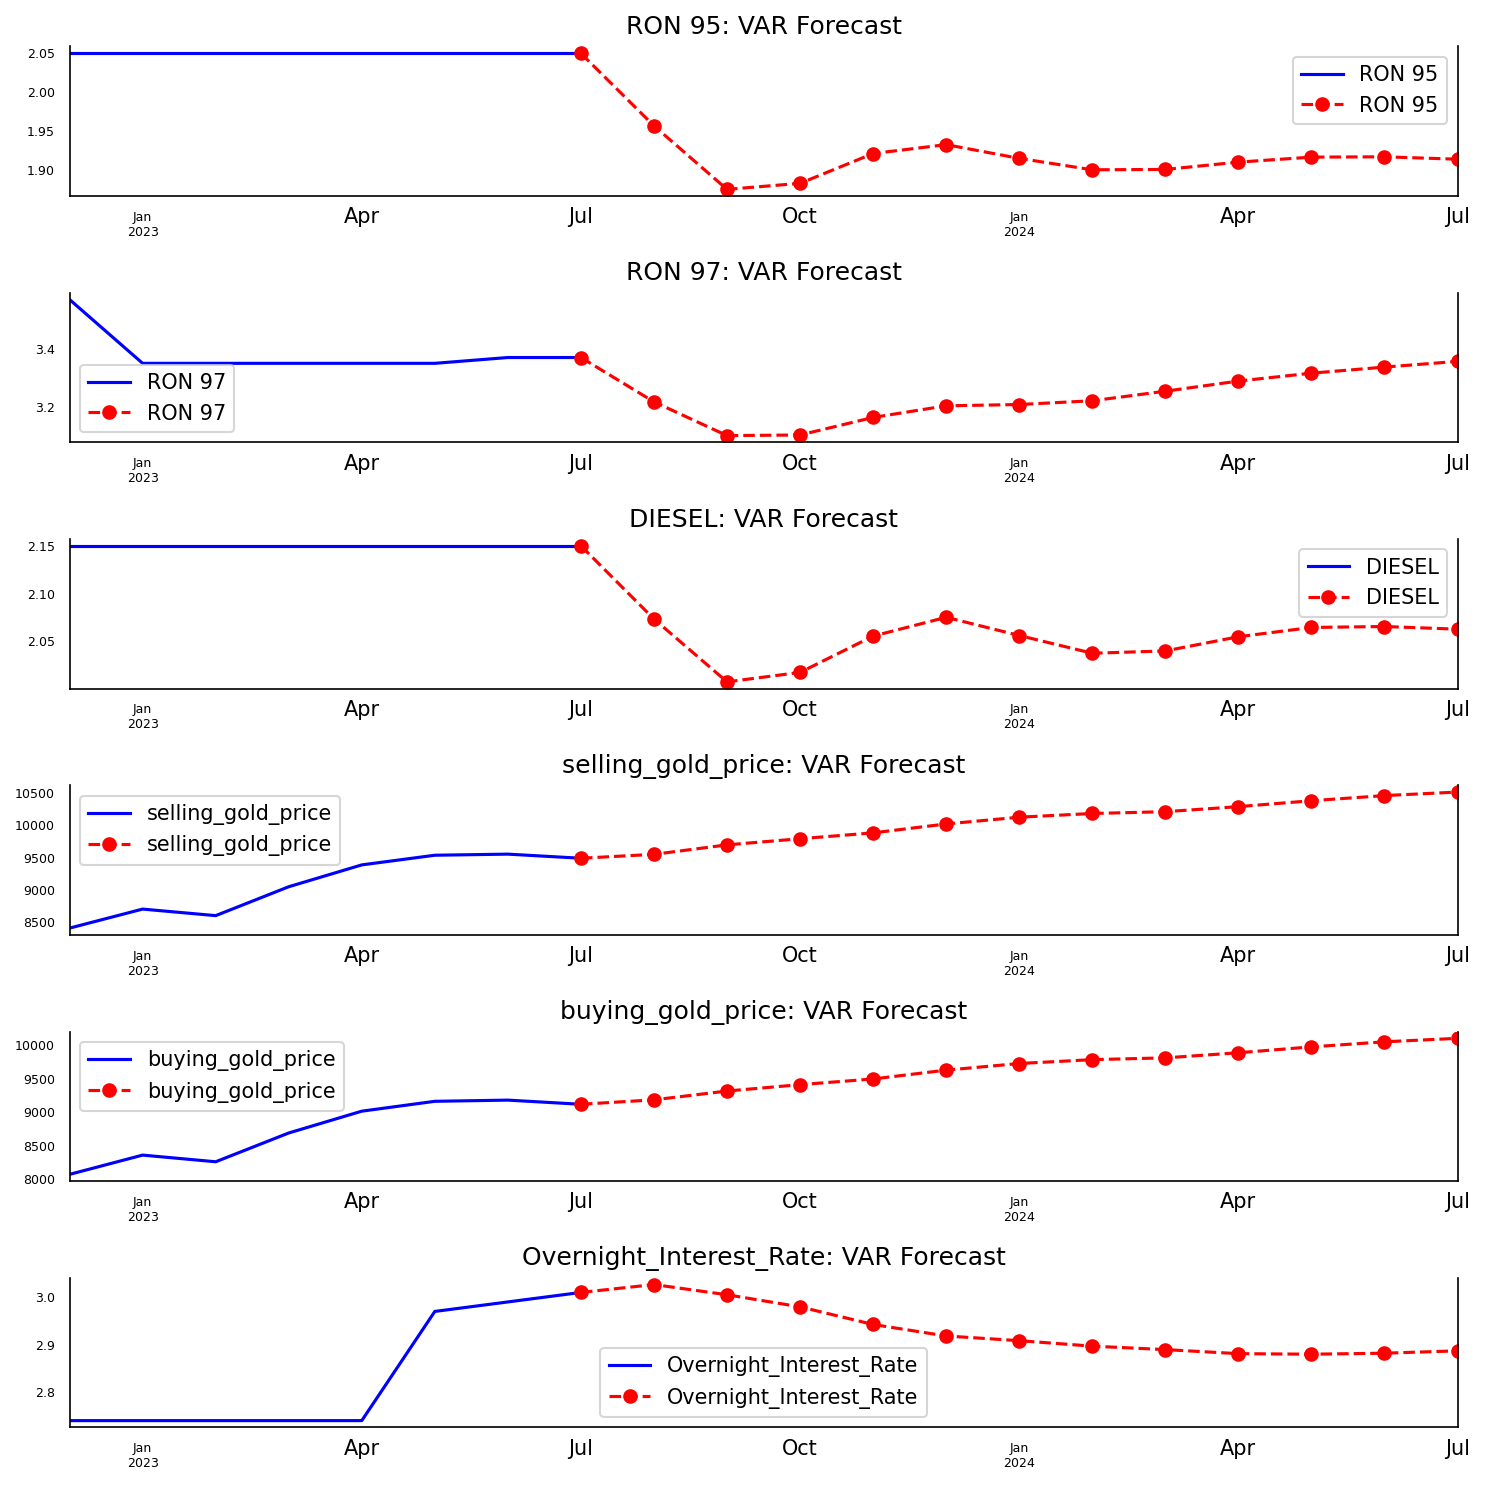

In [234]:
import matplotlib.pyplot as plt

# Determine the index positions corresponding to the dates in fc_window
start_index = var_fc_plot.index.get_loc('2023-08-01')
end_index = var_fc_plot.index.get_loc('2024-07-01')

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(var_fc_plot.columns), ncols=1, dpi=150, figsize=(10,10))

for i, col in enumerate(var_fc_plot.columns):
    ax = axes[i]
    
    # Plot historical data
    var_fc_plot[col].iloc[start_index-8:start_index].plot(legend=True, ax=ax, color='b')
    
    # Plot forecasted data
    var_fc_plot[col].iloc[start_index-1:end_index+1].plot(legend=True, ax=ax, marker='o', color='r', linestyle='--')
    
    # Set title
    ax.set_title(col + ": VAR Forecast")
    
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Make top spine transparent
    ax.spines["top"].set_alpha(0)
    
    # Set tick label size
    ax.tick_params(labelsize=6)

plt.tight_layout()


In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, RMSE, and MAPE
var_mae = mean_absolute_error(df_test_1, df_var_pred_inv)
var_rmse = mean_squared_error(df_test_1, df_var_pred_inv, squared=False)
var_mape = metrics.mean_absolute_percentage_error(df_test_1, df_var_pred_inv)

# Calculate accuracy
var_model_accuracy = 1 - var_mape

# Print the results
print("VAR model evaluation metrics:")
print("----------------------------")
print("MAE (Mean Absolute Error): {:.3f}".format(var_mae))
print("RMSE (Root Mean Squared Error): {:.3f}".format(var_rmse))
print("MAPE (Mean Absolute Percentage Error): {:.3f}".format(var_mape))
print("Accuracy: {:.3f}".format(var_model_accuracy))


VAR model evaluation metrics:
----------------------------
MAE (Mean Absolute Error): 88.356
RMSE (Root Mean Squared Error): 107.196
MAPE (Mean Absolute Percentage Error): 0.092
Accuracy: 0.908


In [236]:
############################# lstm modelling#####################################

In [237]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [238]:
merged_copy

RON 95  RON 97  DIESEL  selling_gold_price  buying_gold_price  \
YearMonth                                                                  
2017-03      2.13    2.41    2.11             5803.65            5566.04   
2017-04      2.22    2.50    2.15             5944.58            5702.42   
2017-05      2.08    2.36    2.01             5707.10            5480.76   
2017-06      1.99    2.25    1.91             5730.11            5506.28   
2017-07      1.98    2.23    1.96             5624.14            5406.38   
...           ...     ...     ...                 ...                ...   
2023-03      2.05    3.35    2.15             9048.91            8689.61   
2023-04      2.05    3.35    2.15             9386.67            9014.83   
2023-05      2.05    3.35    2.15             9536.10            9162.00   
2023-06      2.05    3.37    2.15             9552.95            9179.75   
2023-07      2.05    3.37    2.15             9489.53            9117.66   

           Overnight_Interest_Rate  
YearMonth                           
2017-03                       3.00  
2017-04                       3.00  
2017-05                       3.00  
2017-06                       2.99  
2017-07                       2.98  
...                            ...  
2023-03                       2.74  
2023-04                       2.74  
2023-05                       2.97  
2023-06                       2.99  
2023-07                       3.01  

[77 rows x 6 columns]

In [239]:
new_df = merged_copy.reset_index()

In [240]:
new_df

YearMonth  RON 95  RON 97  DIESEL  selling_gold_price  buying_gold_price  \
0    2017-03    2.13    2.41    2.11             5803.65            5566.04   
1    2017-04    2.22    2.50    2.15             5944.58            5702.42   
2    2017-05    2.08    2.36    2.01             5707.10            5480.76   
3    2017-06    1.99    2.25    1.91             5730.11            5506.28   
4    2017-07    1.98    2.23    1.96             5624.14            5406.38   
..       ...     ...     ...     ...                 ...                ...   
72   2023-03    2.05    3.35    2.15             9048.91            8689.61   
73   2023-04    2.05    3.35    2.15             9386.67            9014.83   
74   2023-05    2.05    3.35    2.15             9536.10            9162.00   
75   2023-06    2.05    3.37    2.15             9552.95            9179.75   
76   2023-07    2.05    3.37    2.15             9489.53            9117.66   

    Overnight_Interest_Rate  
0                      3.00  
1                      3.00  
2                      3.00  
3                      2.99  
4                      2.98  
..                      ...  
72                     2.74  
73                     2.74  
74                     2.97  
75                     2.99  
76                     3.01  

[77 rows x 7 columns]

In [241]:
#Separate dates for future plotting
train_dates = pd.to_datetime(new_df['YearMonth'])
print(train_dates.tail(15)) #Check last few dates. 

62   2022-05-01
63   2022-06-01
64   2022-07-01
65   2022-08-01
66   2022-09-01
67   2022-10-01
68   2022-11-01
69   2022-12-01
70   2023-01-01
71   2023-02-01
72   2023-03-01
73   2023-04-01
74   2023-05-01
75   2023-06-01
76   2023-07-01
Name: YearMonth, dtype: datetime64[ns]


In [242]:
#Variables for training
cols = list(new_df)[1:7]

In [243]:
cols

['RON 95',
 'RON 97',
 'DIESEL',
 'selling_gold_price',
 'buying_gold_price',
 'Overnight_Interest_Rate']

In [244]:
#New dataframe with only training data - 6 columns
df_for_training = new_df[cols].astype(float)

In [245]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [246]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

In [247]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 24  # Number of past days we want to use to predict the future.

In [248]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [249]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [250]:
|

SyntaxError: invalid syntax (525519296.py, line 1)